In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

# EDA Function

In [16]:
def visualize_change_heatmap(data, title, years=None):
    """
    Trực quan bằng Heatmap để có cái nhìn tổng quan giữa các quốc gia qua từng năm

    Tham số:
        data (pd.DataFrame): dữ liệu đầu vào 
        title (str): tên biểu đồ
        years (list, optional): năm
    """

    
    if years is None:
        years = [col for col in data.columns if col.isdigit()]

    # Filter data for heatmap
    heatmap_data = data.set_index("Country")[years]

    # Plot the heatmap
    plt.figure(figsize=(15, 10))
    sns.heatmap(
        heatmap_data, 
        annot=True, 
        fmt=".2f", 
        cmap="Blues", 
        linewidths=0.5, 
    )

    # Customize the plot
    plt.title(title, fontsize=16)
    plt.xlabel("Year", fontsize=14)
    plt.ylabel("Country", fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.yticks(fontsize=12)
    plt.tight_layout()
    plt.show()

In [17]:
def visualize_change_panel_bar_plot(data, title, show_value=True, years=None,):
    """
    Trực quan dữ liệu bằng Panel Bar Plot, so sánh sự khác biệt của các quốc gia theo từng năm.

    Tham số:
        data (pd.DataFrame): dữ liệu đầu vào 
        title (str): tên biểu đồ
        years (list, optional): năm
    """


    if years is None:
        years = [col for col in data.columns if col.isdigit()]
        
    fig, axs = plt.subplots(1, len(years), figsize=(15, 10), sharex=True, sharey=True)
    colors = sns.color_palette('Paired', len(years))
    one_year = True if len(years) == 1 else False
    
    for i, year in enumerate(years):
        value = data[year]
        value.index = data['Country']
        value = value.sort_values()[::-1]
        
        if one_year:
            bars = value.plot(kind='barh', stacked=True, ax=axs, color=colors[i])
            axs.set_ylabel("")
            axs.set_title(f"{year}")
            axs.grid(False)
            for spine in ["left", "right", "top", "bottom"]:
                axs.spines[spine].set_visible(False)
            axs.tick_params(axis='y', length=0)
            if show_value:
                for bar, val in zip(bars.patches, value):
                    axs.text(bar.get_x() + bar.get_width() / 2, bar.get_y() + bar.get_height() / 2, f'{val:.2f}', ha='center', va='center')
            break
        else:
            bars = value.plot(kind='barh', stacked=True, ax=axs[i], color=colors[i])
            axs[i].set_ylabel("")
            axs[i].set_title(f"{year}")
            axs[i].grid(False)
            for spine in ["left", "right", "top", "bottom"]:
                axs[i].spines[spine].set_visible(False)
            axs[i].tick_params(axis='y', length=0)
            if show_value:
                for bar, val in zip(bars.patches, value):
                    axs[i].text(bar.get_x() + bar.get_width() / 2, bar.get_y() + bar.get_height() / 2, f'{val:.2f}', ha='center', va='center')
                    
    plt.suptitle(title, fontsize=11)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

In [18]:
def visualize_change_stacked_bar_plot(data,  title, years=None):
    """
    Trực quan dữ liệu bằng Stacked Bar Plot, so sánh sự thay đổi của từng quốc gia qua các năm.

    Tham số:
        data (pd.DataFrame): dữ liệu đầu vào 
        title (str): tên biểu đồ
        years (list, optional): năm
    """


    if years is None:
        years = [col for col in data.columns if col.isdigit()]

    # Filter the data for the selected countries
    country_list = data['Country']
    filtered_data = data[data['Country'].isin(country_list)]
    
    # Set the country names as the index
    filtered_data.set_index('Country', inplace=True)
    
    # Select only the years to be plotted
    values = filtered_data[years]
    
    # Plot the stacked bar chart
    values.plot(kind='bar', stacked=True, figsize=(20, 8), colormap='Accent')
    
    # Customize the plot
    plt.title(title, fontsize=16)
    plt.ylabel("Indicator", fontsize=14)
    plt.xlabel("Country", fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.legend(title="Year", fontsize=12)
    plt.tight_layout()
    plt.show()

In [19]:
def top_k_countries_by_year(data, years=None, k=5):
    """
    Lấy ra top k quốc gia theo từng năm.

    Tham số:
        data (pd.DataFrame): dữ liệu đầu vào 
        years (list, optional): năm
    """

    
    if years is None:
        years = [col for col in data.columns if col.isdigit()]
    for year in years:
        if year not in data.columns:
            print(f"Year {year} not found in the dataset.")
            continue

        top_k = data.sort_values(by=year, ascending=False).head(k)

        print(f"Top {k} countries for {year}:")
        for _, row in top_k.iterrows():
            print(f"Country: {row['Country']}, Value: {row[year]:.3f}")
        print('-' * 40)

In [20]:
def bottom_k_countries_by_year(data, years=None, k=5):
    """
    Lấy ra bottom k quốc gia theo từng năm.

    Tham số:
        data (pd.DataFrame): dữ liệu đầu vào 
        years (list, optional): năm
    """

    
    if years is None:
        years = [col for col in data.columns if col.isdigit()]
    for year in years:
        if year not in data.columns:
            print(f"Year {year} not found in the dataset.")
            continue

        bot_k = data.sort_values(by=year, ascending=True).head(k)

        print(f"Bottom {k} countries for {year}:")
        for _, row in bot_k.iterrows():
            print(f"Country: {row['Country']}, Value: {row[year]:.3f}")
        print('-' * 40)

In [21]:
def visualize_top_bottom_k_line_plot(df, k,  years = None):
    """
    Biểu đồ đường trực quan k quốc gia có chỉ số cao nhất và thấp nhất dựa vào giá trị trung bình qua các năm.

    Tham số:
        data (pd.DataFrame): dữ liệu đầu vào 
        years (list, optional): năm
        k: Số nguyên k>0, số lượng quốc gia thể hiện trên chart
    """
    # Prepare data
    data = df.copy()
    if years is None:
        years = [col for col in data.columns if col.isdigit()]

    # Calculate averages
    data['Average'] = data[years].mean(axis=1)
    top_k = data.nlargest(k, 'Average')
    bottom_k = data.nsmallest(k, 'Average')

    # Identify extremes
    highest_country = data.nlargest(1, 'Average')
    lowest_country = data.nsmallest(1, 'Average')

    # Combine for visualization
    combined = pd.concat([top_k, bottom_k])

    # Setup plot aesthetics
    plt.figure(figsize=(14, 10), dpi=120)
    ax = plt.gca()

    # Plot each country's data
    for _, row in combined.iterrows():
        if row['Country'] in highest_country['Country'].values:
            color = "#2E86C1"  # Highlight color for highest country
            label = f"{row['Country']} (Highest)"
        elif row['Country'] in lowest_country['Country'].values:
            color = "#E74C3C"  # Highlight color for lowest country
            label = f"{row['Country']} (Lowest)"
        else:
            color = "#95A5A6"  # Neutral color for others
            label = row['Country']

        sns.lineplot(x=years, y=row[years].values, label=label, 
                     linewidth=2, color=color, marker='o', ax=ax)

        # Annotate the last year's point
        ax.text(years[-1], row[years].iloc[-1], f" {row['Country']}", 
                fontsize=10, fontweight='bold', color=color, ha='left', va='center')

    # Title and captions
    ax.set_title(f"Top-{k} and Bottom-{k} Countries with Focus on Extremes", 
                 fontsize=16, weight='bold', loc='left', color="#333333")
    ax.set_xlabel("Year", fontsize=12, color="#333333")
    ax.set_ylabel("Indicator Value", fontsize=12, color="#333333")
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Adjust ticks and remove frame
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    plt.xticks(fontsize=10, color="#333333")
    plt.yticks(fontsize=10, color="#333333")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)

    plt.tight_layout()
    plt.show()


In [74]:
def visualize_bubble_chart(df, title, years=None):
    # Filter the data for the specific indicator
    data = df.copy()
    if years is None:
        years = [col for col in data.columns if col.isdigit()]

    # Calculate the average value across the specified years
    data['Average'] = data[years].mean(axis=1)

    # Create a bubble chart for each year
    plt.figure(figsize=(14, 8))
    for year in years:
        plt.scatter(data['Country'], [year] * len(data), s=data[year] /10,
            alpha=0.6,
            label=f"{year}"
        )

    # Chart customization
    plt.title(title, fontsize=16)
    plt.xlabel("Country", fontsize=12)
    plt.ylabel("Year", fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(alpha=0.6)
    plt.legend(title="Years", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
    plt.tight_layout()
    plt.show()

# EDA

In [22]:
cdf = pd.read_csv('../data/preprecessed_data/asian_cdf.csv')
cdf

Country ISO3            Indicator       Unit   2018   2019   2020  \
0      Armenia  ARM              Drought  Number of    0.0    0.0    0.0   
1      Armenia  ARM  Extreme temperature  Number of    0.0    0.0    0.0   
2      Armenia  ARM                Flood  Number of    0.0    0.0    0.0   
3      Armenia  ARM            Landslide  Number of    0.0    0.0    0.0   
4      Armenia  ARM                Storm  Number of    1.0    1.0    1.0   
..         ...  ...                  ...        ...    ...    ...    ...   
276  Singapore  SGP            Landslide  Number of    0.0    0.0    0.0   
277  Singapore  SGP                Storm  Number of    0.0    0.0    0.0   
278  Singapore  SGP                TOTAL  Number of    0.0    0.0    0.0   
279  Singapore  SGP             Wildfire  Number of    0.0    0.0    0.0   
280      World  WLD                TOTAL  Number of  290.0  361.0  375.0   

      2021   2022  
0      0.0    0.0  
1      0.0    0.0  
2      0.0    0.0  
3      0.0    0.0  
4      0.0    0.0  
..     ...    ...  
276    0.0    0.0  
277    0.0    0.0  
278    0.0    0.0  
279    0.0    0.0  
280  391.0  351.0  

[281 rows x 9 columns]

In [23]:
cdf['Indicator'].value_counts()

Indicator
TOTAL                  41
Drought                40
Extreme temperature    40
Flood                  40
Landslide              40
Storm                  40
Wildfire               40
Name: count, dtype: int64

Bộ dữ liệu Land Cover Accounts gồm 7 chỉ số:
* **TOTAL:** 
* **Flood:** 
* **Storm:** 
* **Drought:**
* **Landslide:**
* **Extreme temperature:**
* **Wildfire:**

## TOTAL

In [24]:
total = cdf[cdf['Indicator']=='TOTAL']
total

Country ISO3 Indicator       Unit   2018   2019   2020  \
5                 Armenia  ARM     TOTAL  Number of    1.0    1.0    1.0   
11             Bangladesh  BGD     TOTAL  Number of    4.0    6.0    2.0   
14                 Bhutan  BTN     TOTAL  Number of    0.0    0.0    0.0   
16      Brunei Darussalam  BRN     TOTAL  Number of    0.0    0.0    0.0   
21               Cambodia  KHM     TOTAL  Number of    1.0    1.0    2.0   
27                  China  CHN     TOTAL  Number of   20.0   13.0   11.0   
32                 Cyprus  CYP     TOTAL  Number of    0.0    0.0    0.0   
37                Georgia  GEO     TOTAL  Number of    1.0    1.0    1.0   
43                  India  IND     TOTAL  Number of   23.0   12.0   11.0   
49              Indonesia  IDN     TOTAL  Number of    8.0   14.0   26.0   
55                   Iran  IRN     TOTAL  Number of    1.0    3.0    7.0   
60                   Iraq  IRQ     TOTAL  Number of    1.0    1.0    1.0   
65                 Israel  ISR     TOTAL  Number of    1.0    0.0    2.0   
71                  Japan  JPN     TOTAL  Number of    5.0    9.0    4.0   
77                 Jordan  JOR     TOTAL  Number of    2.0    0.0    0.0   
83             Kazakhstan  KAZ     TOTAL  Number of    1.0    0.0    1.0   
89            North Korea  PRK     TOTAL  Number of    3.0    2.0    1.0   
95            South Korea  KOR     TOTAL  Number of    1.0    4.0    5.0   
102            Kyrgyzstan  KGZ     TOTAL  Number of    0.0    0.0    0.0   
106                  Laos  LAO     TOTAL  Number of    3.0    2.0    2.0   
110               Lebanon  LBN     TOTAL  Number of    1.0    1.0    1.0   
116              Malaysia  MYS     TOTAL  Number of    2.0    4.0    5.0   
120              Maldives  MDV     TOTAL  Number of    0.0    1.0    0.0   
126              Mongolia  MNG     TOTAL  Number of    3.0    3.0    4.0   
131               Myanmar  MMR     TOTAL  Number of    4.0    3.0    2.0   
138                 Nepal  NPL     TOTAL  Number of    2.0    2.0    1.0   
142                  Oman  OMN     TOTAL  Number of    2.0    1.0    1.0   
148              Pakistan  PAK     TOTAL  Number of    2.0   10.0    6.0   
154           Philippines  PHL     TOTAL  Number of    8.0    9.0    7.0   
158          Saudi Arabia  SAU     TOTAL  Number of    0.0    3.0    1.0   
163             Sri Lanka  LKA     TOTAL  Number of    3.0    6.0    3.0   
168  Syrian Arab Republic  SYR     TOTAL  Number of    0.0    1.0    1.0   
175              Thailand  THA     TOTAL  Number of    0.0    3.0    7.0   
180           Timor-Leste  TLS     TOTAL  Number of    0.0    0.0    1.0   
185               Türkiye  TUR     TOTAL  Number of    1.0    3.0    5.0   
188          Turkmenistan  TKM     TOTAL  Number of    0.0    0.0    0.0   
190  United Arab Emirates  ARE     TOTAL  Number of    0.0    0.0    0.0   
194            Uzbekistan  UZB     TOTAL  Number of    0.0    0.0    1.0   
199              Viet Nam  VNM     TOTAL  Number of    7.0    8.0   11.0   
278             Singapore  SGP     TOTAL  Number of    0.0    0.0    0.0   
280                 World  WLD     TOTAL  Number of  290.0  361.0  375.0   

      2021   2022  
5      0.0    0.0  
11     2.0    2.0  
14     1.0    0.0  
16     0.0    0.0  
21     4.0    2.0  
27    12.0    7.0  
32     1.0    0.0  
37     1.0    1.0  
43    16.0    7.0  
49    21.0   13.0  
55     4.0    3.0  
60     3.0    1.0  
65     0.0    0.0  
71     4.0    6.0  
77     0.0    0.0  
83     1.0    0.0  
89     1.0    0.0  
95     1.0    4.0  
102    1.0    1.0  
106    1.0    1.0  
110    0.0    0.0  
116    8.0    6.0  
120    1.0    0.0  
126    2.0    2.0  
131    1.0    0.0  
138    4.0    4.0  
142    2.0    0.0  
148    6.0    4.0  
154   13.0    9.0  
158    0.0    0.0  
163    5.0    5.0  
168    2.0    1.0  
175    6.0   11.0  
180    1.0    0.0  
185    3.0    3.0  
188    0.0    0.0  
190    0.0    0.0  
194    1.0    1.0  
199    8.0    8.0  
278    0.0    0.0  
280  

In [25]:
tmp = total[total['ISO3'] != 'WLD']

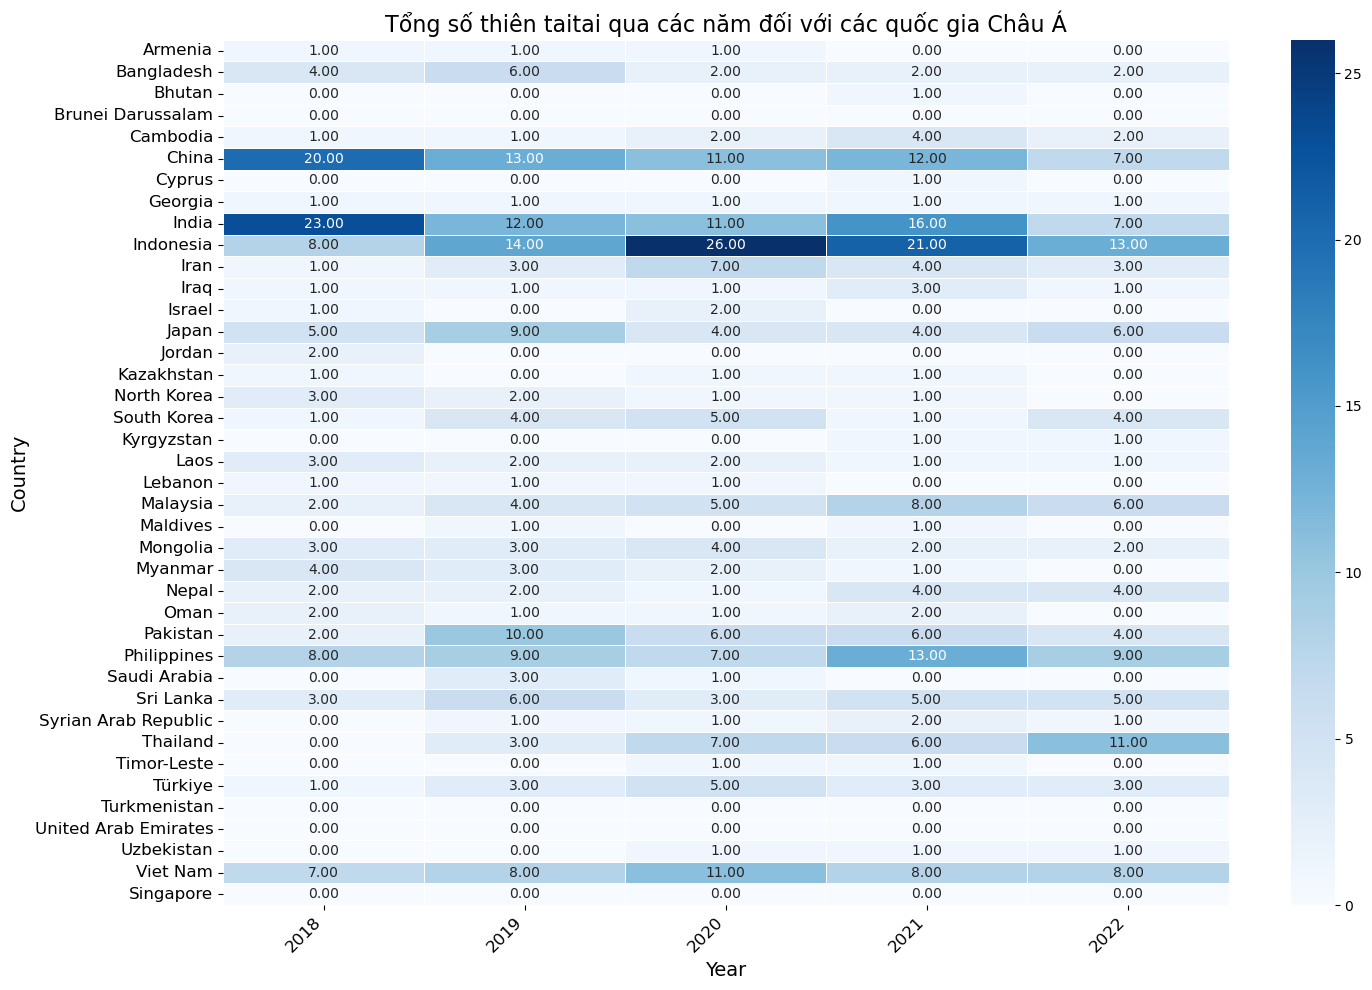

In [26]:
title = "Tổng số thiên taitai qua các năm đối với các quốc gia Châu Á"
visualize_change_heatmap(tmp, title)

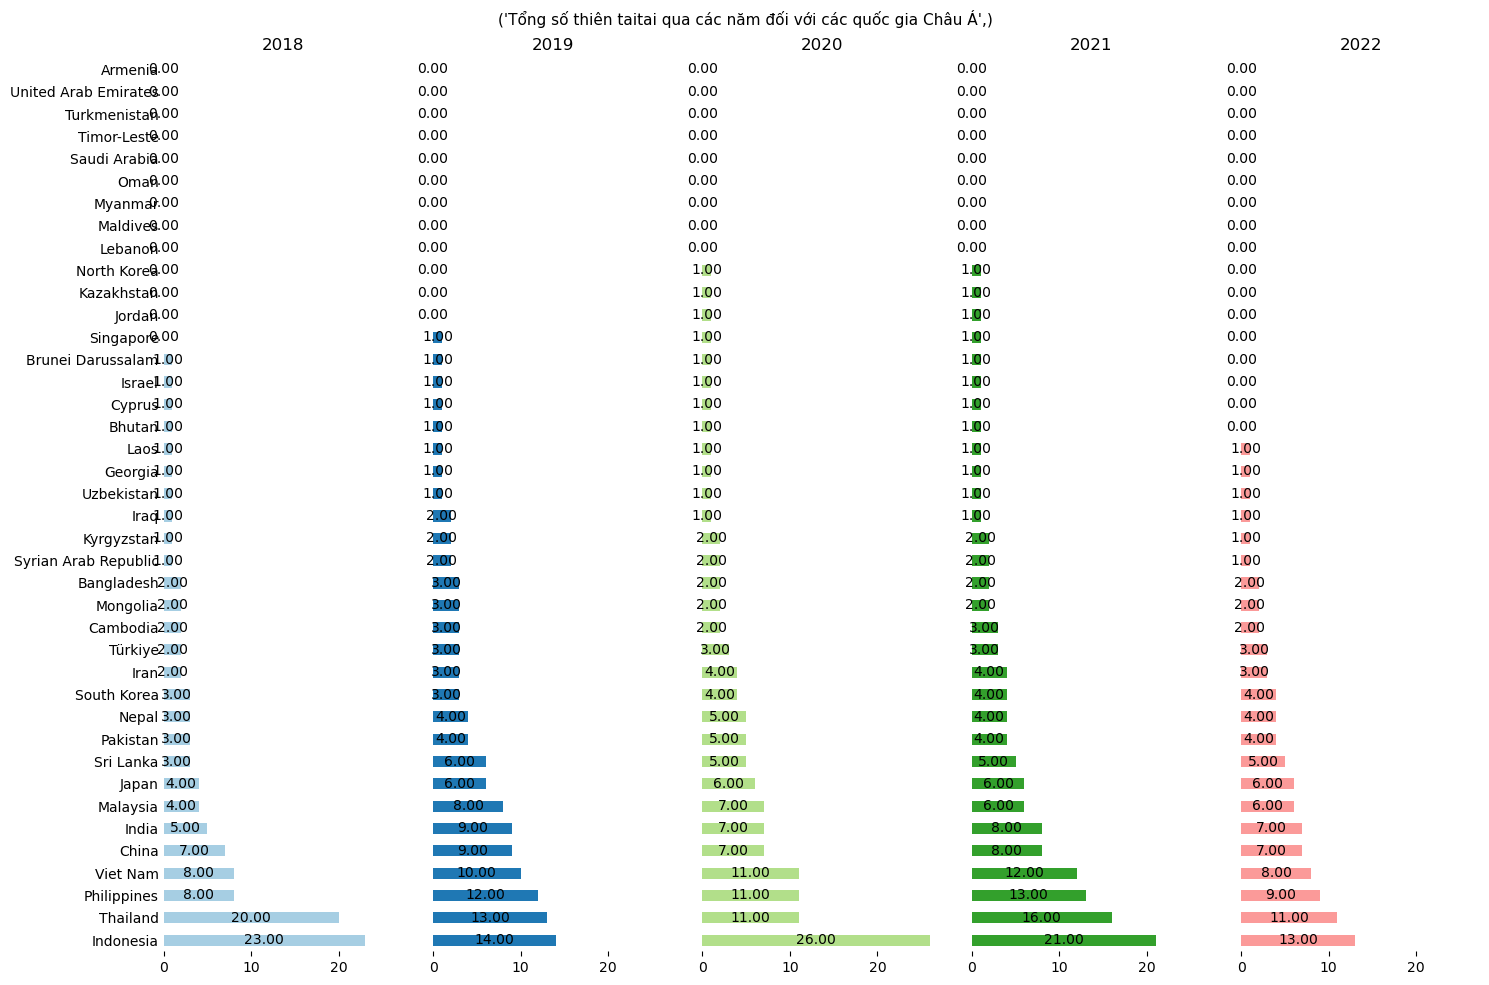

In [27]:
title="Tổng số thiên taitai qua các năm đối với các quốc gia Châu Á",
visualize_change_panel_bar_plot(tmp, title)

Lấy Top3 nước có sự thay đổi nhiệt độ lớn nhất trong khu vực theo các năm

In [28]:
top_k_countries_by_year(tmp, k=3)

Top 3 countries for 2018:
Country: India, Value: 23.000
Country: China, Value: 20.000
Country: Indonesia, Value: 8.000
----------------------------------------
Top 3 countries for 2019:
Country: Indonesia, Value: 14.000
Country: China, Value: 13.000
Country: India, Value: 12.000
----------------------------------------
Top 3 countries for 2020:
Country: Indonesia, Value: 26.000
Country: India, Value: 11.000
Country: Viet Nam, Value: 11.000
----------------------------------------
Top 3 countries for 2021:
Country: Indonesia, Value: 21.000
Country: India, Value: 16.000
Country: Philippines, Value: 13.000
----------------------------------------
Top 3 countries for 2022:
Country: Indonesia, Value: 13.000
Country: Thailand, Value: 11.000
Country: Philippines, Value: 9.000
----------------------------------------


In [29]:
bottom_k_countries_by_year(tmp, k=3)

Bottom 3 countries for 2018:
Country: Singapore, Value: 0.000
Country: Uzbekistan, Value: 0.000
Country: Bhutan, Value: 0.000
----------------------------------------
Bottom 3 countries for 2019:
Country: Singapore, Value: 0.000
Country: Uzbekistan, Value: 0.000
Country: Bhutan, Value: 0.000
----------------------------------------
Bottom 3 countries for 2020:
Country: Singapore, Value: 0.000
Country: Bhutan, Value: 0.000
Country: Brunei Darussalam, Value: 0.000
----------------------------------------
Bottom 3 countries for 2021:
Country: Armenia, Value: 0.000
Country: United Arab Emirates, Value: 0.000
Country: Turkmenistan, Value: 0.000
----------------------------------------
Bottom 3 countries for 2022:
Country: Armenia, Value: 0.000
Country: United Arab Emirates, Value: 0.000
Country: Turkmenistan, Value: 0.000
----------------------------------------


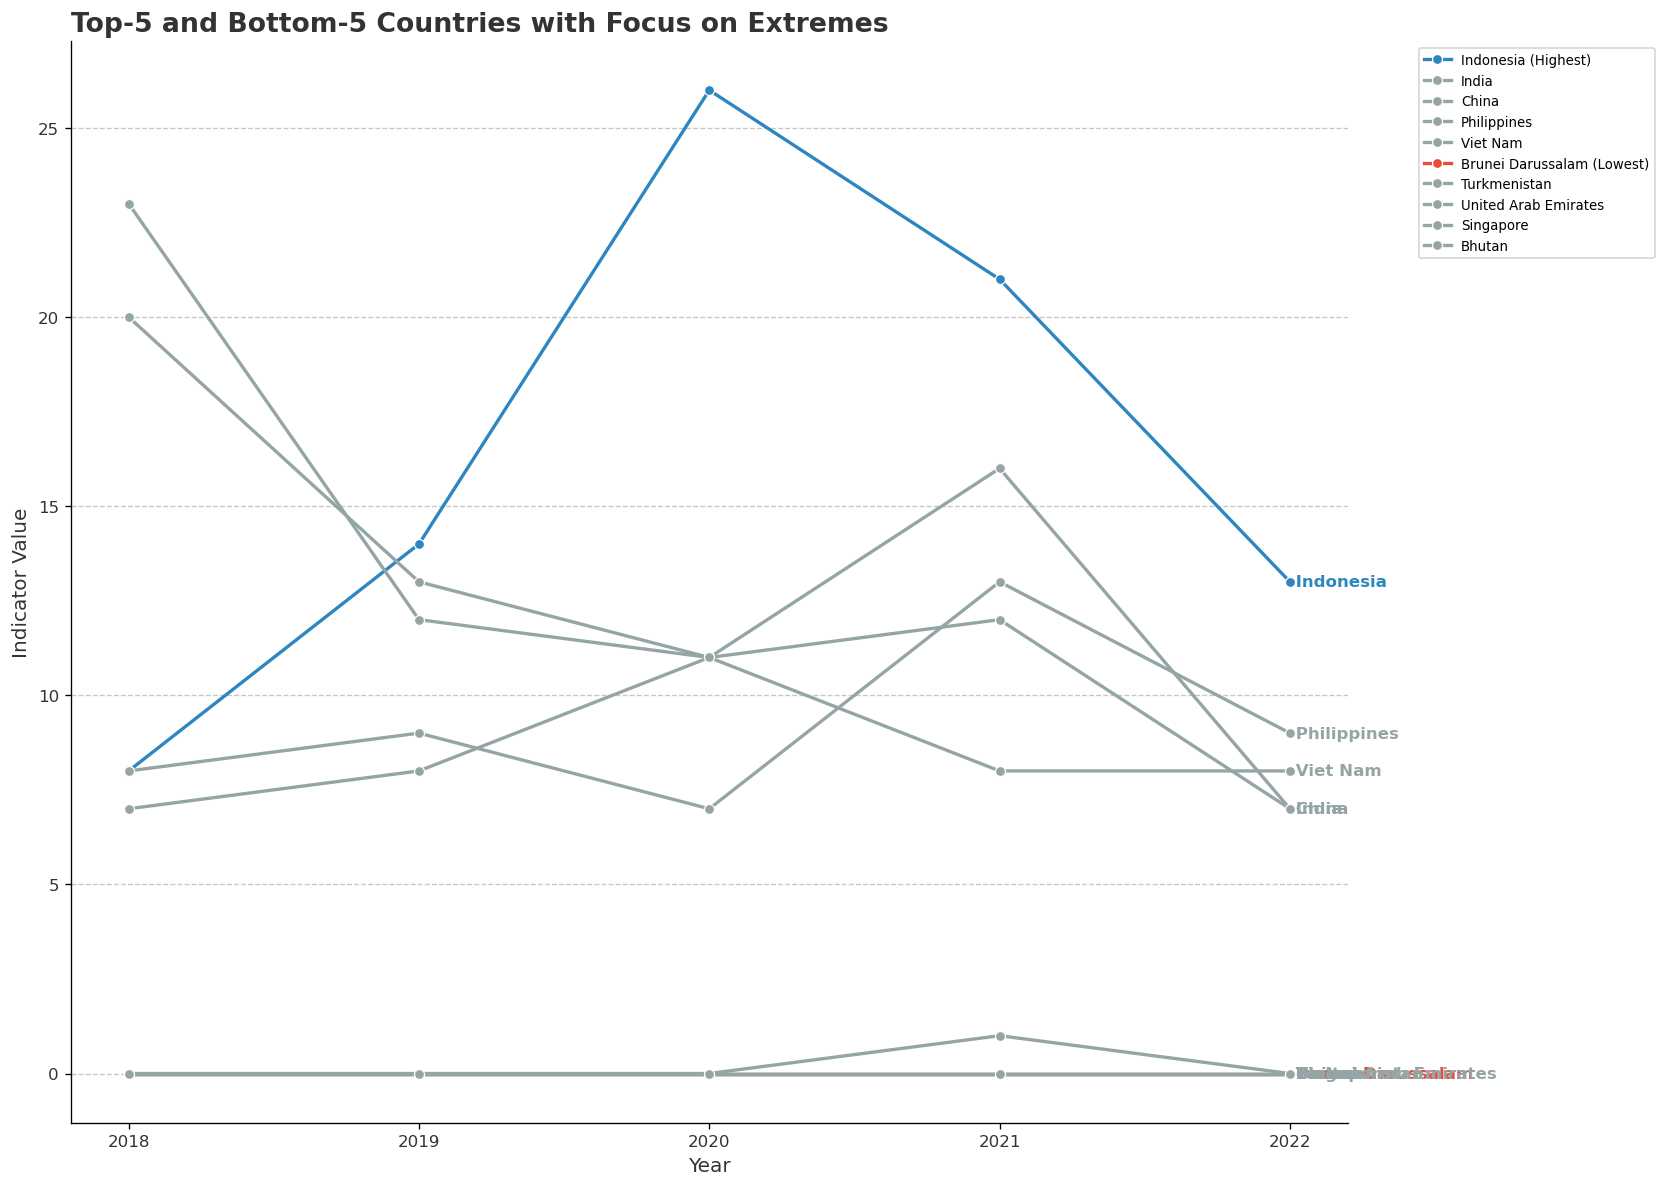

In [30]:
visualize_top_bottom_k_line_plot(tmp, 5)

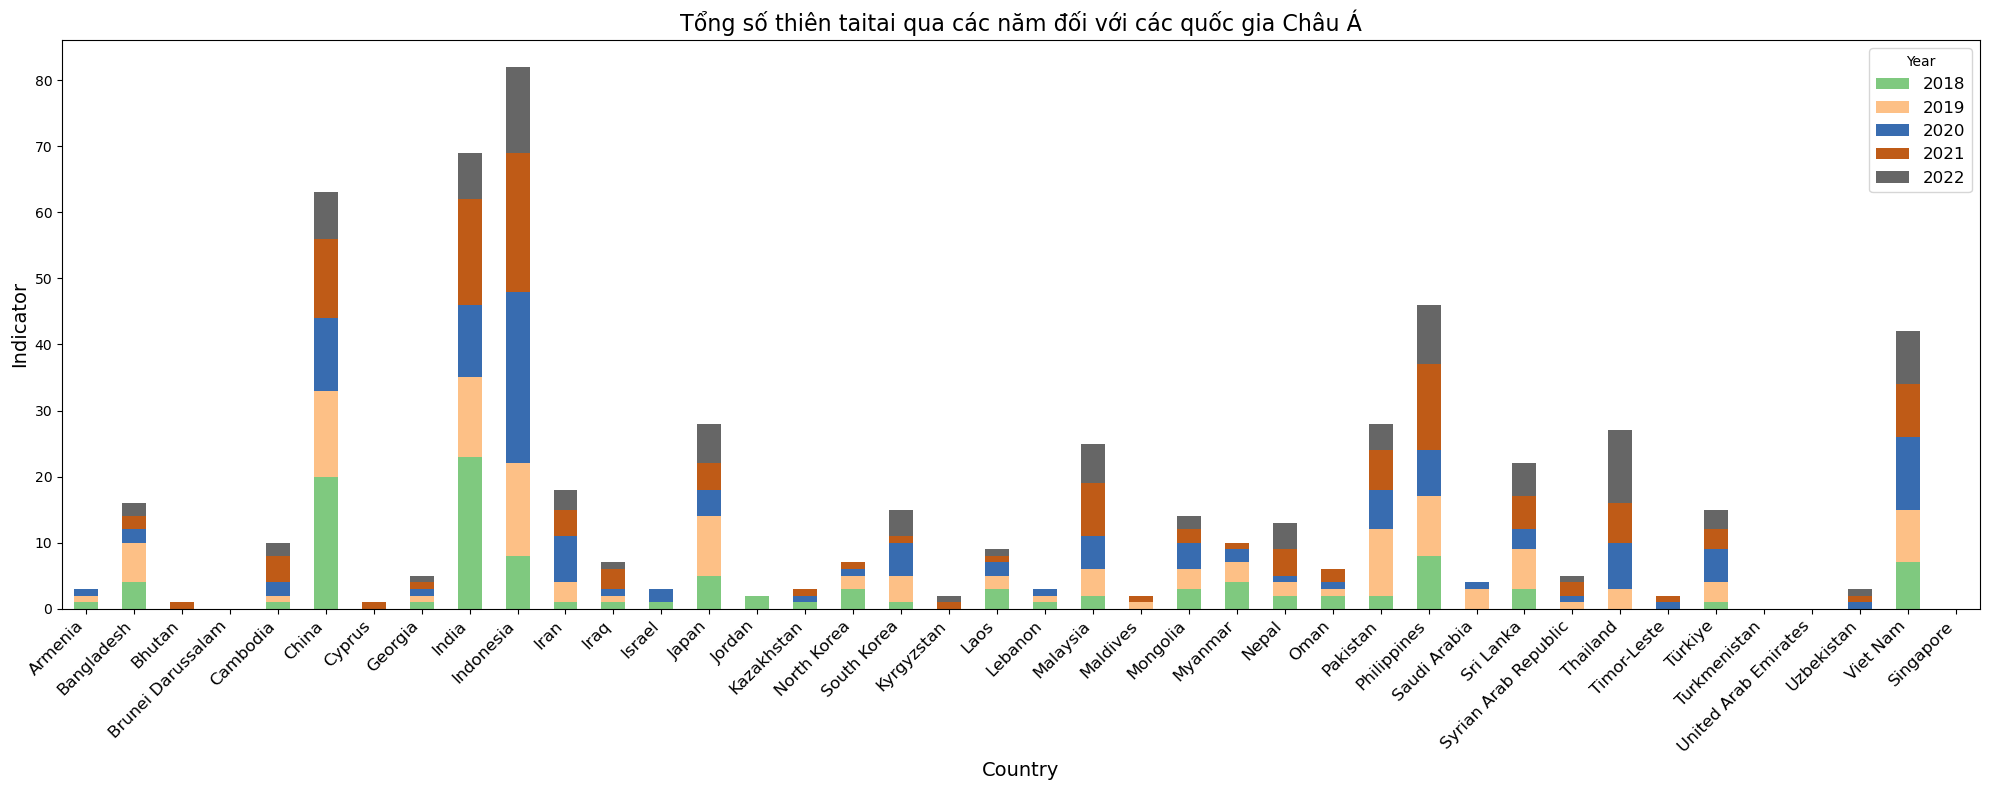

In [31]:
title = "Tổng số thiên taitai qua các năm đối với các quốc gia Châu Á"
visualize_change_stacked_bar_plot(tmp, title)

## Flood

In [32]:
flood = cdf[cdf['Indicator']=='Flood']
flood

Country ISO3 Indicator       Unit  2018  2019  2020  2021  \
2                 Armenia  ARM     Flood  Number of   0.0   0.0   0.0   0.0   
8              Bangladesh  BGD     Flood  Number of   2.0   1.0   1.0   1.0   
12                 Bhutan  BTN     Flood  Number of   0.0   0.0   0.0   1.0   
19               Cambodia  KHM     Flood  Number of   1.0   1.0   0.0   3.0   
24                  China  CHN     Flood  Number of   8.0   6.0   5.0   4.0   
35                Georgia  GEO     Flood  Number of   1.0   1.0   1.0   1.0   
40                  India  IND     Flood  Number of   9.0   5.0   5.0   9.0   
46              Indonesia  IDN     Flood  Number of   6.0  11.0  25.0  18.0   
52                   Iran  IRN     Flood  Number of   1.0   3.0   6.0   1.0   
58                   Iraq  IRQ     Flood  Number of   1.0   1.0   1.0   2.0   
63                 Israel  ISR     Flood  Number of   1.0   0.0   1.0   0.0   
68                  Japan  JPN     Flood  Number of   1.0   3.0   1.0   2.0   
75                 Jordan  JOR     Flood  Number of   2.0   0.0   0.0   0.0   
80             Kazakhstan  KAZ     Flood  Number of   1.0   0.0   1.0   0.0   
87            North Korea  PRK     Flood  Number of   1.0   0.0   1.0   1.0   
92            South Korea  KOR     Flood  Number of   0.0   0.0   2.0   0.0   
99             Kyrgyzstan  KGZ     Flood  Number of   0.0   0.0   0.0   0.0   
104                  Laos  LAO     Flood  Number of   1.0   1.0   0.0   0.0   
108               Lebanon  LBN     Flood  Number of   0.0   0.0   0.0   0.0   
113              Malaysia  MYS     Flood  Number of   2.0   4.0   5.0   8.0   
118              Maldives  MDV     Flood  Number of   0.0   1.0   0.0   0.0   
123              Mongolia  MNG     Flood  Number of   1.0   1.0   3.0   1.0   
128               Myanmar  MMR     Flood  Number of   3.0   2.0   1.0   1.0   
135                 Nepal  NPL     Flood  Number of   1.0   1.0   1.0   4.0   
140                  Oman  OMN     Flood  Number of   0.0   1.0   1.0   0.0   
145              Pakistan  PAK     Flood  Number of   1.0   8.0   4.0   4.0   
151           Philippines  PHL     Flood  Number of   1.0   1.0   0.0   5.0   
156          Saudi Arabia  SAU     Flood  Number of   0.0   3.0   1.0   0.0   
160             Sri Lanka  LKA     Flood  Number of   3.0   5.0   2.0   4.0   
165  Syrian Arab Republic  SYR     Flood  Number of   0.0   1.0   0.0   1.0   
172              Thailand  THA     Flood  Number of   0.0   1.0   3.0   5.0   
178           Timor-Leste  TLS     Flood  Number of   0.0   0.0   1.0   0.0   
182               Türkiye  TUR     Flood  Number of   0.0   3.0   3.0   2.0   
187          Turkmenistan  TKM     Flood  Number of   0.0   0.0   0.0   0.0   
189  United Arab Emirates  ARE     Flood  Number of   0.0   0.0   0.0   0.0   
192            Uzbekistan  UZB     Flood  Number of   0.0   0.0   1.0   0.0   
196              Viet Nam  VNM     Flood  Number of   3.0   5.0   1.0   3.0   
206     Brunei Darussalam  BRN     Flood  Number of   0.0   0.0   0.0   0.0   
214                Cyprus  CYP     Flood  Number of   0.0   0.0   0.0   0.0   
275             Singapore  SGP     Flood  Number of   0.0   0.0   0.0   0.0   

     2022  
2     0.0  
8     1.0  
12    0.0  
19    1.0  
24    4.0  
35    1.0  
40    3.0  
46   13.0  
52    3.0  
58    0.0  
63    0.0  
68    1.0  
75    0.0  
80    0.0  
87    0.0  
92    1.0  
99    0.0  
104   1.0  
108   0.0  
113   5.0  
118   0.0  
123   1.0  
128   0.0  
135   2.0  
140   0.0  
145   1.0  
151   2.0  
156   0.0  
160   3.0  
165   0.0  
172   9.0  
178   0.0  
182   3.0  
187   0.0  
189   0.0  
192   1.0  
196   5.0  
206   0.0  
214   0.0  
275   0.0

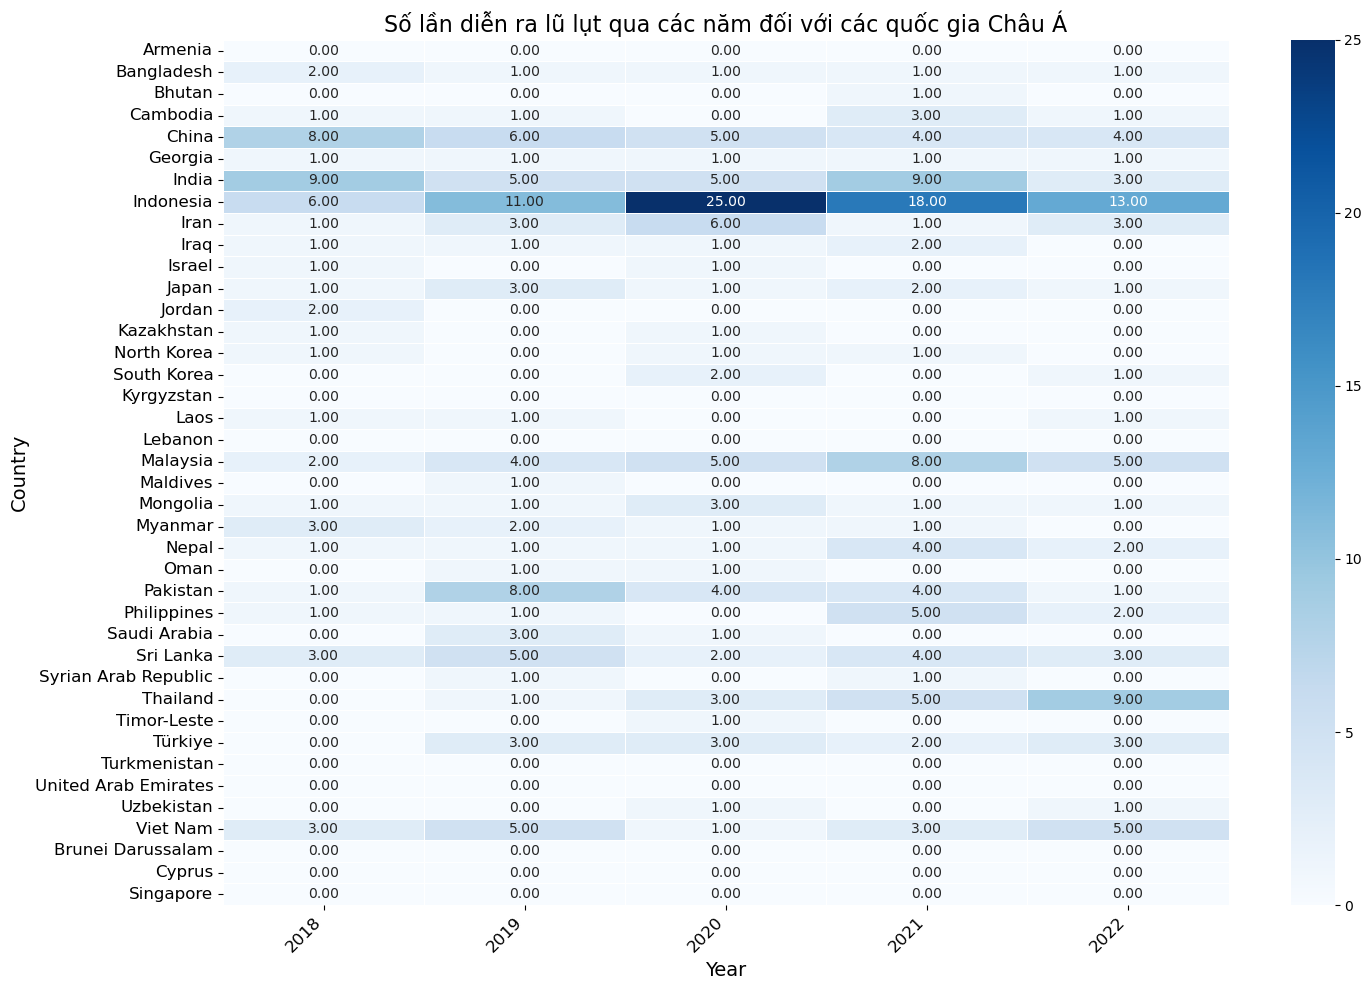

In [33]:
title = "Số lần diễn ra lũ lụt qua các năm đối với các quốc gia Châu Á"
visualize_change_heatmap(flood, title)

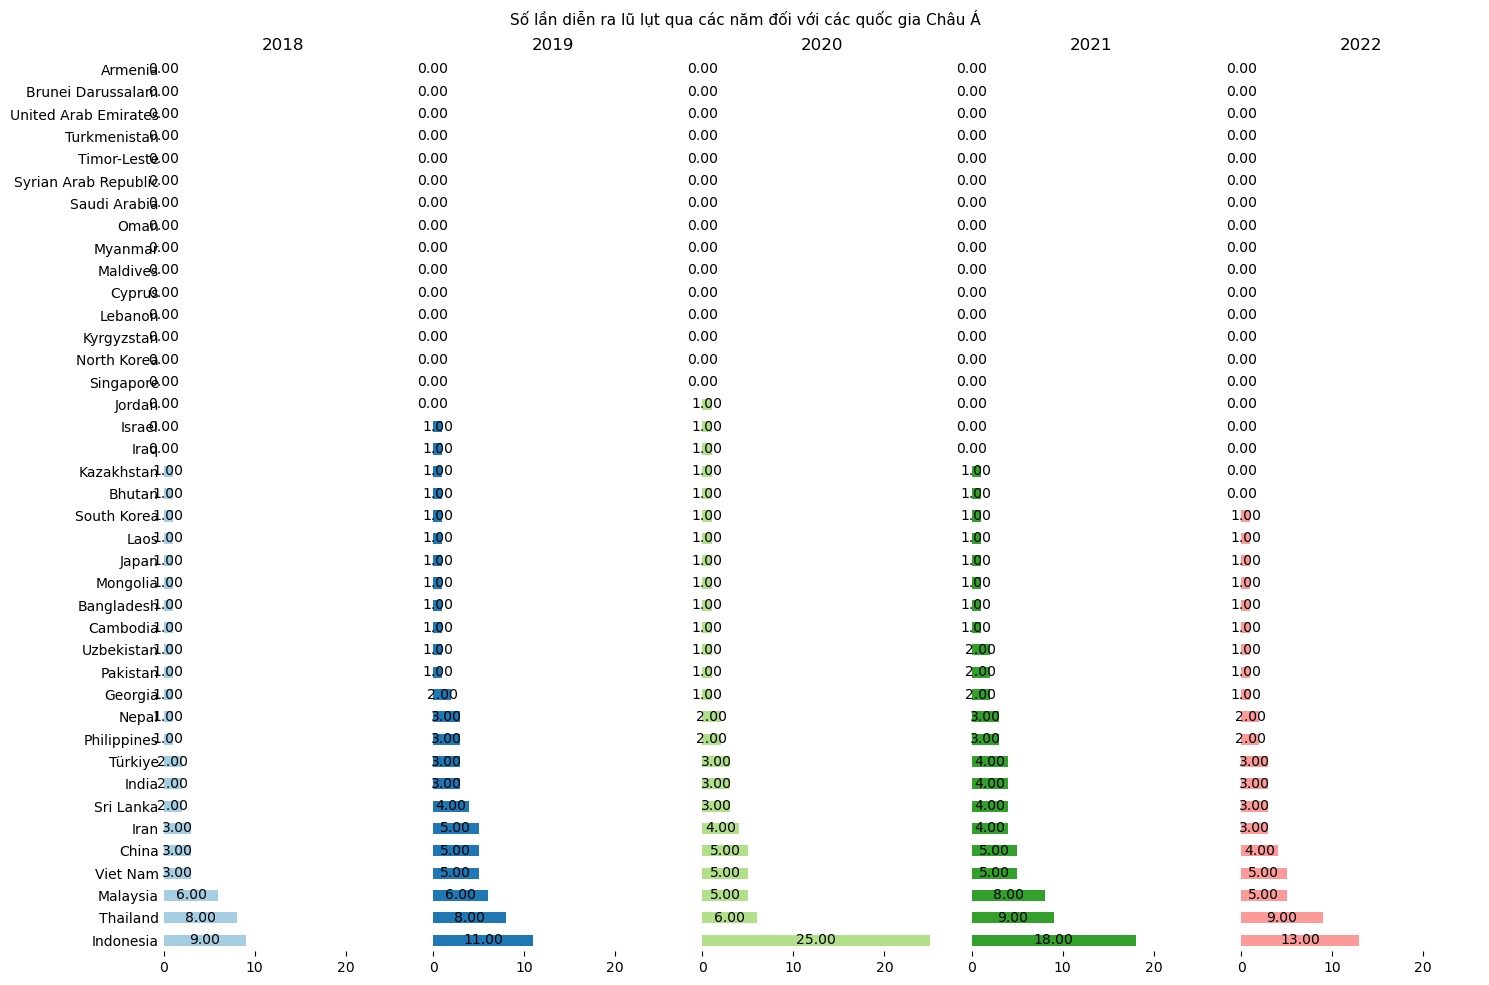

In [34]:
title="Số lần diễn ra lũ lụt qua các năm đối với các quốc gia Châu Á"
visualize_change_panel_bar_plot(flood, title)

Lấy Top3 nước có sự thay đổi nhiệt độ lớn nhất trong khu vực theo các năm

In [35]:
top_k_countries_by_year(flood, k=3)

Top 3 countries for 2018:
Country: India, Value: 9.000
Country: China, Value: 8.000
Country: Indonesia, Value: 6.000
----------------------------------------
Top 3 countries for 2019:
Country: Indonesia, Value: 11.000
Country: Pakistan, Value: 8.000
Country: China, Value: 6.000
----------------------------------------
Top 3 countries for 2020:
Country: Indonesia, Value: 25.000
Country: Iran, Value: 6.000
Country: Malaysia, Value: 5.000
----------------------------------------
Top 3 countries for 2021:
Country: Indonesia, Value: 18.000
Country: India, Value: 9.000
Country: Malaysia, Value: 8.000
----------------------------------------
Top 3 countries for 2022:
Country: Indonesia, Value: 13.000
Country: Thailand, Value: 9.000
Country: Viet Nam, Value: 5.000
----------------------------------------


In [36]:
bottom_k_countries_by_year(flood, k=3)

Bottom 3 countries for 2018:
Country: Armenia, Value: 0.000
Country: Brunei Darussalam, Value: 0.000
Country: Uzbekistan, Value: 0.000
----------------------------------------
Bottom 3 countries for 2019:
Country: Armenia, Value: 0.000
Country: Brunei Darussalam, Value: 0.000
Country: Uzbekistan, Value: 0.000
----------------------------------------
Bottom 3 countries for 2020:
Country: Armenia, Value: 0.000
Country: Brunei Darussalam, Value: 0.000
Country: United Arab Emirates, Value: 0.000
----------------------------------------
Bottom 3 countries for 2021:
Country: Armenia, Value: 0.000
Country: Brunei Darussalam, Value: 0.000
Country: Uzbekistan, Value: 0.000
----------------------------------------
Bottom 3 countries for 2022:
Country: Armenia, Value: 0.000
Country: Brunei Darussalam, Value: 0.000
Country: United Arab Emirates, Value: 0.000
----------------------------------------


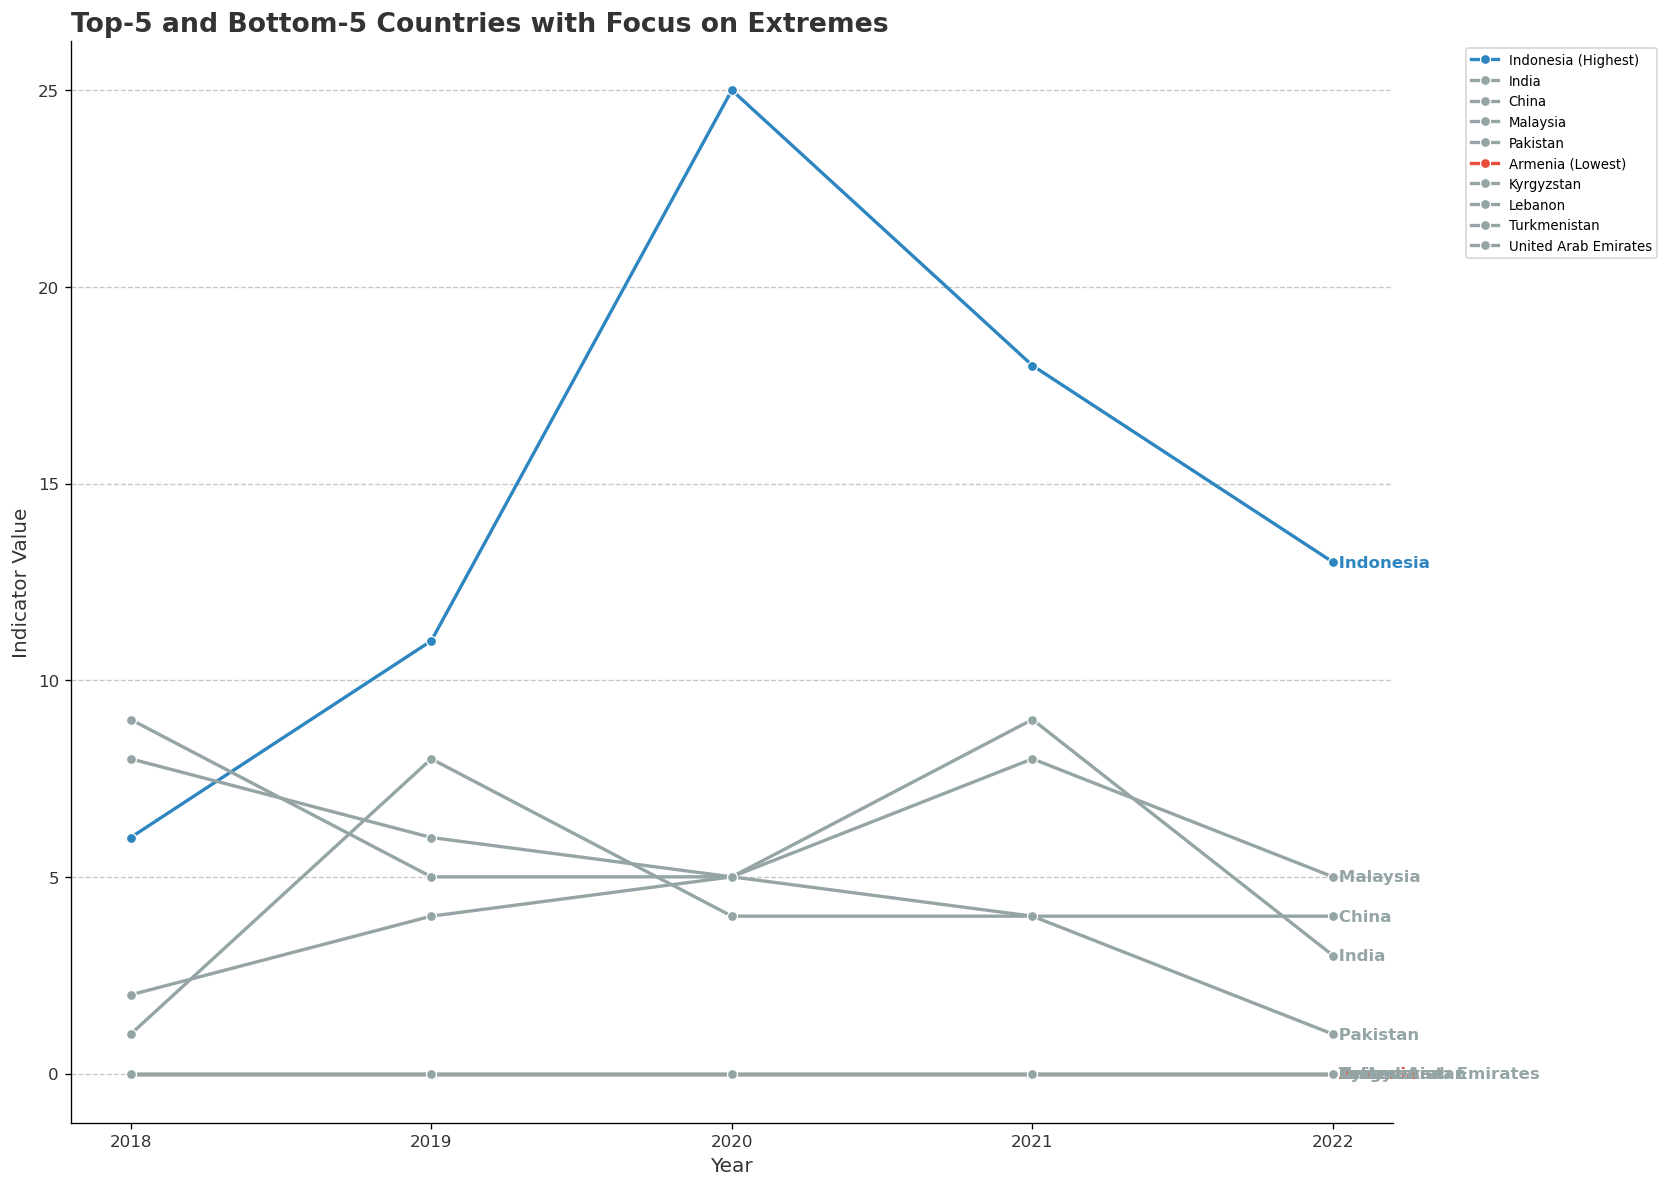

In [37]:
visualize_top_bottom_k_line_plot(flood, 5)

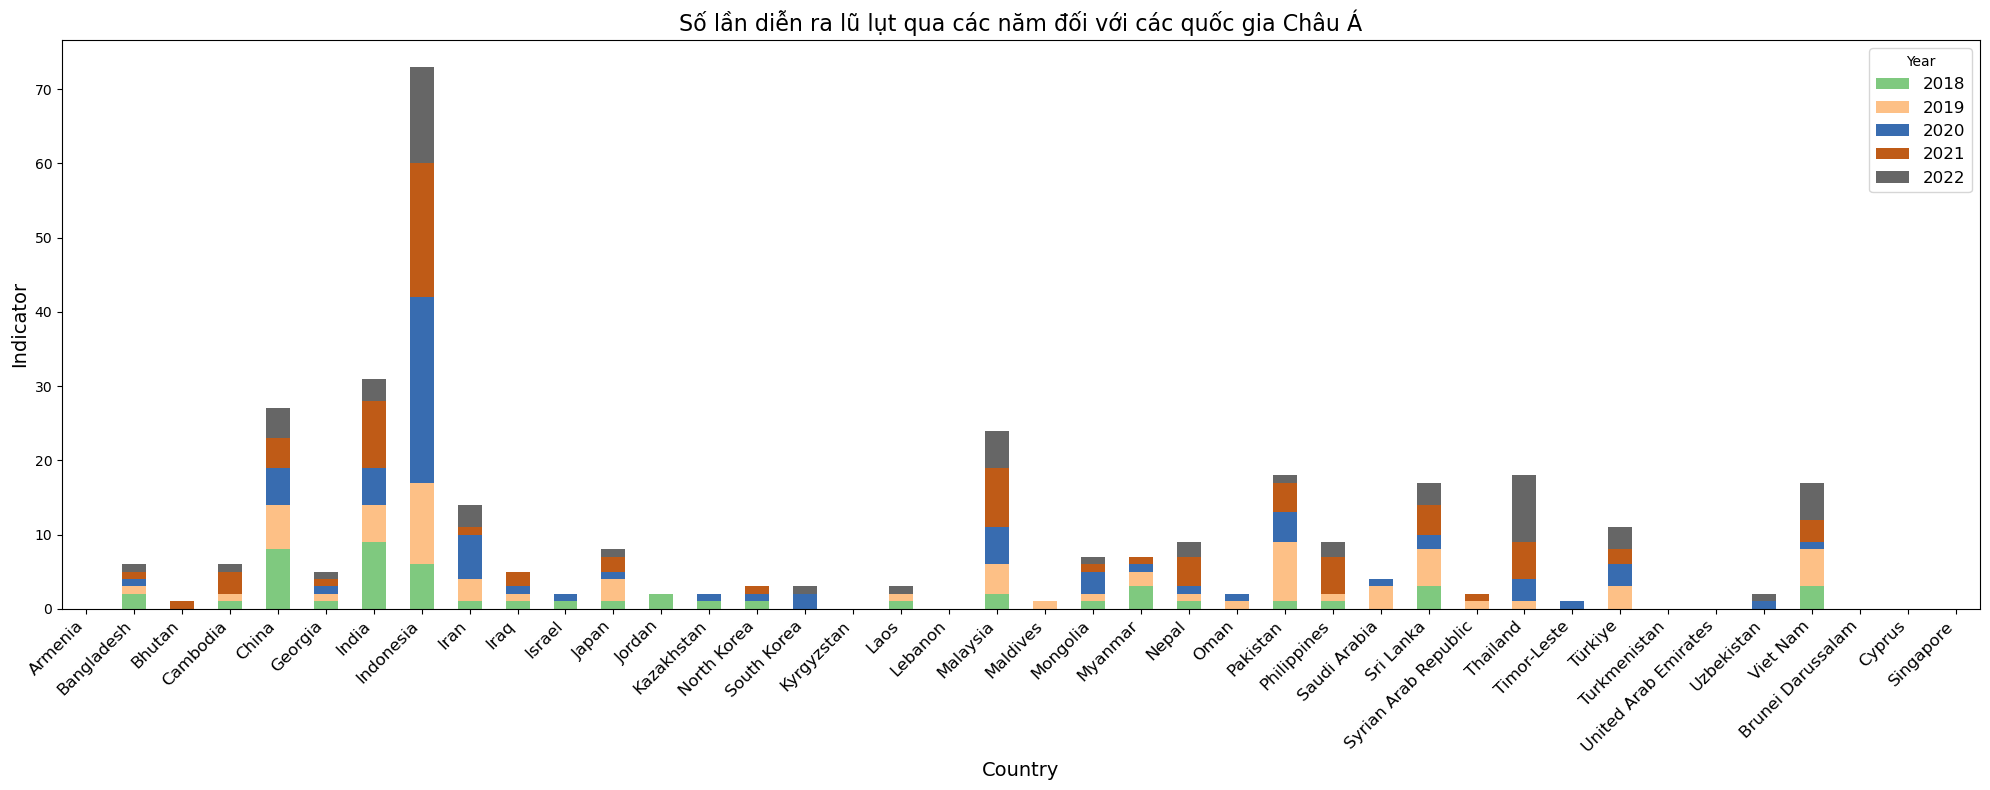

In [38]:
title = "Số lần diễn ra lũ lụt qua các năm đối với các quốc gia Châu Á"
visualize_change_stacked_bar_plot(flood, title)

## Storm

In [39]:
Storm = cdf[cdf['Indicator']=='Storm']
Storm

Country ISO3 Indicator       Unit  2018  2019  2020  2021  \
4                 Armenia  ARM     Storm  Number of   1.0   1.0   1.0   0.0   
10             Bangladesh  BGD     Storm  Number of   1.0   3.0   1.0   1.0   
13                 Bhutan  BTN     Storm  Number of   0.0   0.0   0.0   0.0   
20               Cambodia  KHM     Storm  Number of   0.0   0.0   2.0   1.0   
26                  China  CHN     Storm  Number of  12.0   4.0   4.0   7.0   
31                 Cyprus  CYP     Storm  Number of   0.0   0.0   0.0   0.0   
36                Georgia  GEO     Storm  Number of   0.0   0.0   0.0   0.0   
42                  India  IND     Storm  Number of  11.0   5.0   4.0   5.0   
48              Indonesia  IDN     Storm  Number of   0.0   0.0   0.0   1.0   
54                   Iran  IRN     Storm  Number of   0.0   0.0   0.0   2.0   
59                   Iraq  IRQ     Storm  Number of   0.0   0.0   0.0   0.0   
64                 Israel  ISR     Storm  Number of   0.0   0.0   0.0   0.0   
70                  Japan  JPN     Storm  Number of   3.0   4.0   3.0   1.0   
76                 Jordan  JOR     Storm  Number of   0.0   0.0   0.0   0.0   
82             Kazakhstan  KAZ     Storm  Number of   0.0   0.0   0.0   0.0   
88            North Korea  PRK     Storm  Number of   1.0   1.0   0.0   0.0   
94            South Korea  KOR     Storm  Number of   0.0   3.0   3.0   1.0   
101            Kyrgyzstan  KGZ     Storm  Number of   0.0   0.0   0.0   0.0   
105                  Laos  LAO     Storm  Number of   2.0   0.0   2.0   1.0   
109               Lebanon  LBN     Storm  Number of   1.0   1.0   0.0   0.0   
115              Malaysia  MYS     Storm  Number of   0.0   0.0   0.0   0.0   
119              Maldives  MDV     Storm  Number of   0.0   0.0   0.0   1.0   
125              Mongolia  MNG     Storm  Number of   1.0   1.0   1.0   1.0   
130               Myanmar  MMR     Storm  Number of   0.0   0.0   0.0   0.0   
137                 Nepal  NPL     Storm  Number of   0.0   1.0   0.0   0.0   
141                  Oman  OMN     Storm  Number of   2.0   0.0   0.0   2.0   
147              Pakistan  PAK     Storm  Number of   0.0   1.0   1.0   2.0   
153           Philippines  PHL     Storm  Number of   7.0   7.0   6.0   8.0   
157          Saudi Arabia  SAU     Storm  Number of   0.0   0.0   0.0   0.0   
162             Sri Lanka  LKA     Storm  Number of   0.0   0.0   1.0   1.0   
167  Syrian Arab Republic  SYR     Storm  Number of   0.0   0.0   0.0   0.0   
174              Thailand  THA     Storm  Number of   0.0   1.0   4.0   1.0   
179           Timor-Leste  TLS     Storm  Number of   0.0   0.0   0.0   1.0   
184               Türkiye  TUR     Storm  Number of   0.0   0.0   1.0   0.0   
198              Viet Nam  VNM     Storm  Number of   4.0   2.0  10.0   5.0   
208     Brunei Darussalam  BRN     Storm  Number of   0.0   0.0   0.0   0.0   
261          Turkmenistan  TKM     Storm  Number of   0.0   0.0   0.0   0.0   
266  United Arab Emirates  ARE     Storm  Number of   0.0   0.0   0.0   0.0   
270            Uzbekistan  UZB     Storm  Number of   0.0   0.0   0.0   0.0   
277             Singapore  SGP     Storm  Number of   0.0   0.0   0.0   0.0   

     2022  
4     0.0  
10    1.0  
13    0.0  
20    1.0  
26    1.0  
31    0.0  
36    0.0  
42    2.0  
48    0.0  
54    0.0  
59    1.0  
64    0.0  
70    4.0  
76    0.0  
82    0.0  
88    0.0  
94    1.0  
101   0.0  
105   0.0  
109   0.0  
115   0.0  
119   0.0  
125   0.0  
130   0.0  
137   1.0  
141   0.0  
147   1.0  
153   6.0  
157   0.0  
162   2.0  
167   1.0  
174   2.0  
179   0.0  
184   0.0  
198   3.0  
208   0.0  
261   0.0  
266   0.0  
270   0.0  
277   0.0

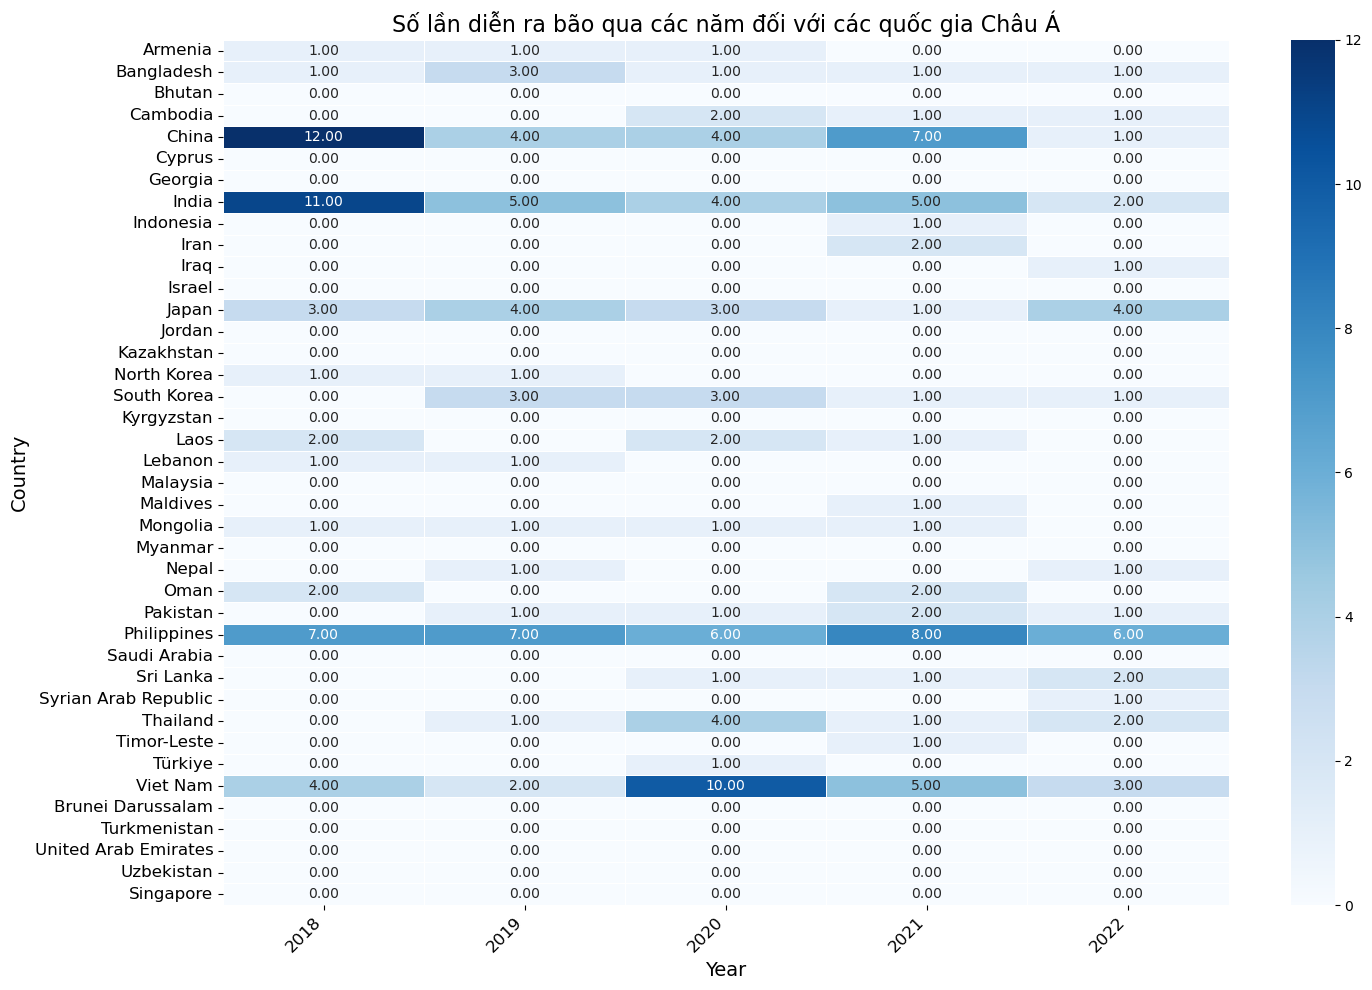

In [40]:
title = "Số lần diễn ra bão qua các năm đối với các quốc gia Châu Á"
visualize_change_heatmap(Storm, title)

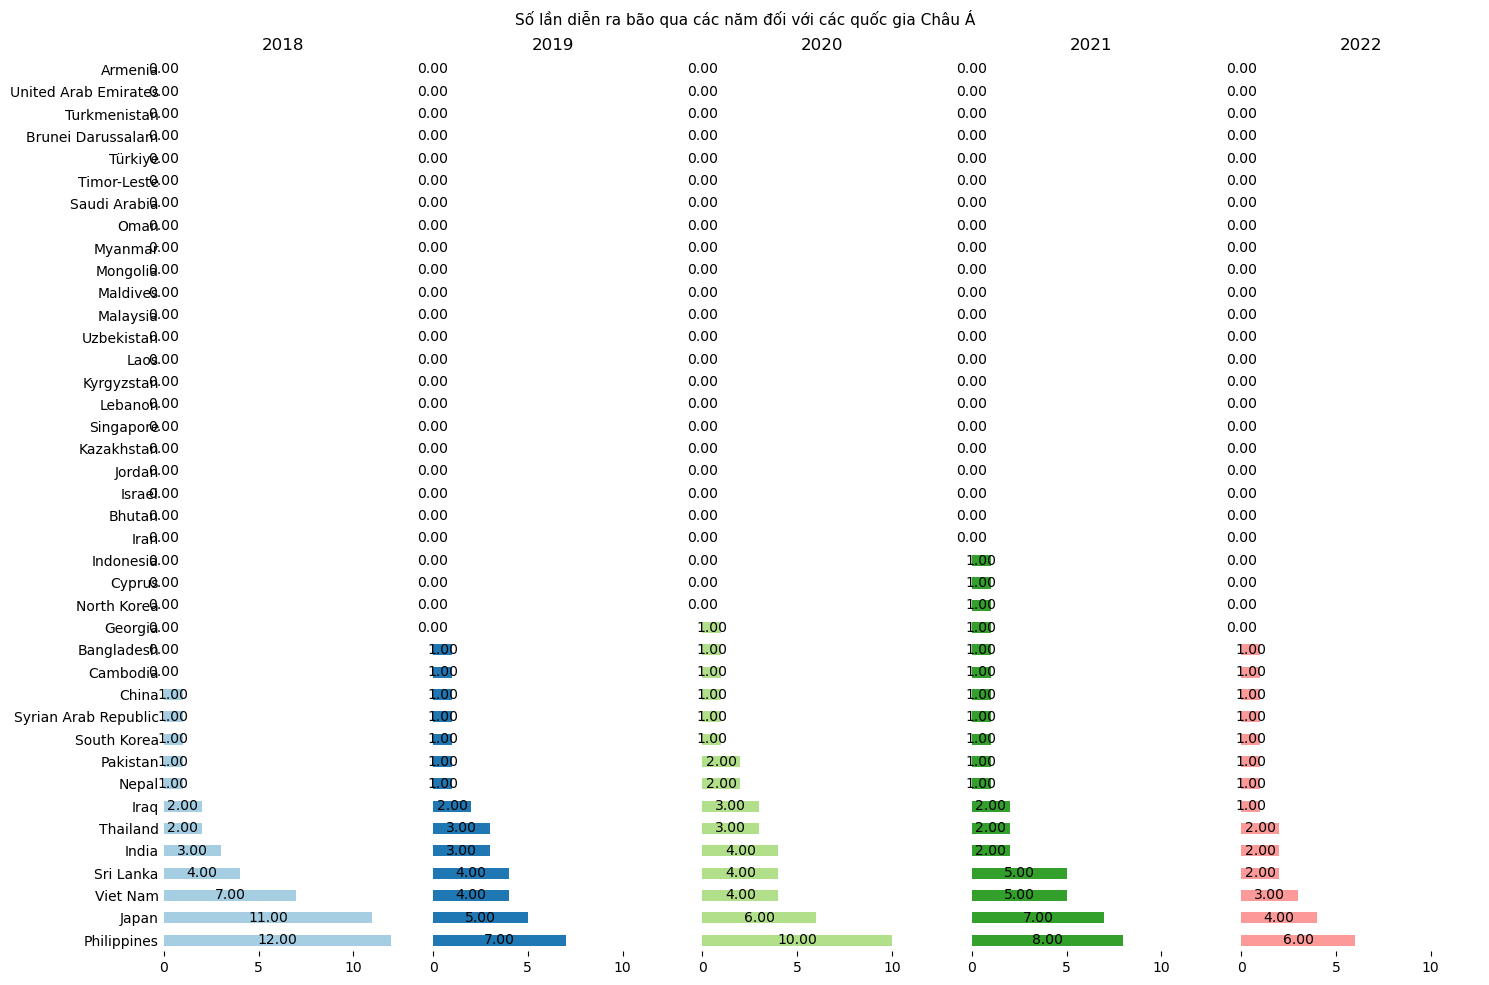

In [41]:
title="Số lần diễn ra bão qua các năm đối với các quốc gia Châu Á"
visualize_change_panel_bar_plot(Storm, title)

Lấy Top3 nước có sự thay đổi nhiệt độ lớn nhất trong khu vực theo các năm

In [42]:
top_k_countries_by_year(Storm, k=3)

Top 3 countries for 2018:
Country: China, Value: 12.000
Country: India, Value: 11.000
Country: Philippines, Value: 7.000
----------------------------------------
Top 3 countries for 2019:
Country: Philippines, Value: 7.000
Country: India, Value: 5.000
Country: Japan, Value: 4.000
----------------------------------------
Top 3 countries for 2020:
Country: Viet Nam, Value: 10.000
Country: Philippines, Value: 6.000
Country: Thailand, Value: 4.000
----------------------------------------
Top 3 countries for 2021:
Country: Philippines, Value: 8.000
Country: China, Value: 7.000
Country: India, Value: 5.000
----------------------------------------
Top 3 countries for 2022:
Country: Philippines, Value: 6.000
Country: Japan, Value: 4.000
Country: Viet Nam, Value: 3.000
----------------------------------------


In [43]:
bottom_k_countries_by_year(Storm, k=3)

Bottom 3 countries for 2018:
Country: Singapore, Value: 0.000
Country: Sri Lanka, Value: 0.000
Country: Nepal, Value: 0.000
----------------------------------------
Bottom 3 countries for 2019:
Country: Singapore, Value: 0.000
Country: Sri Lanka, Value: 0.000
Country: Myanmar, Value: 0.000
----------------------------------------
Bottom 3 countries for 2020:
Country: Lebanon, Value: 0.000
Country: United Arab Emirates, Value: 0.000
Country: Turkmenistan, Value: 0.000
----------------------------------------
Bottom 3 countries for 2021:
Country: Armenia, Value: 0.000
Country: United Arab Emirates, Value: 0.000
Country: Turkmenistan, Value: 0.000
----------------------------------------
Bottom 3 countries for 2022:
Country: Armenia, Value: 0.000
Country: United Arab Emirates, Value: 0.000
Country: Turkmenistan, Value: 0.000
----------------------------------------


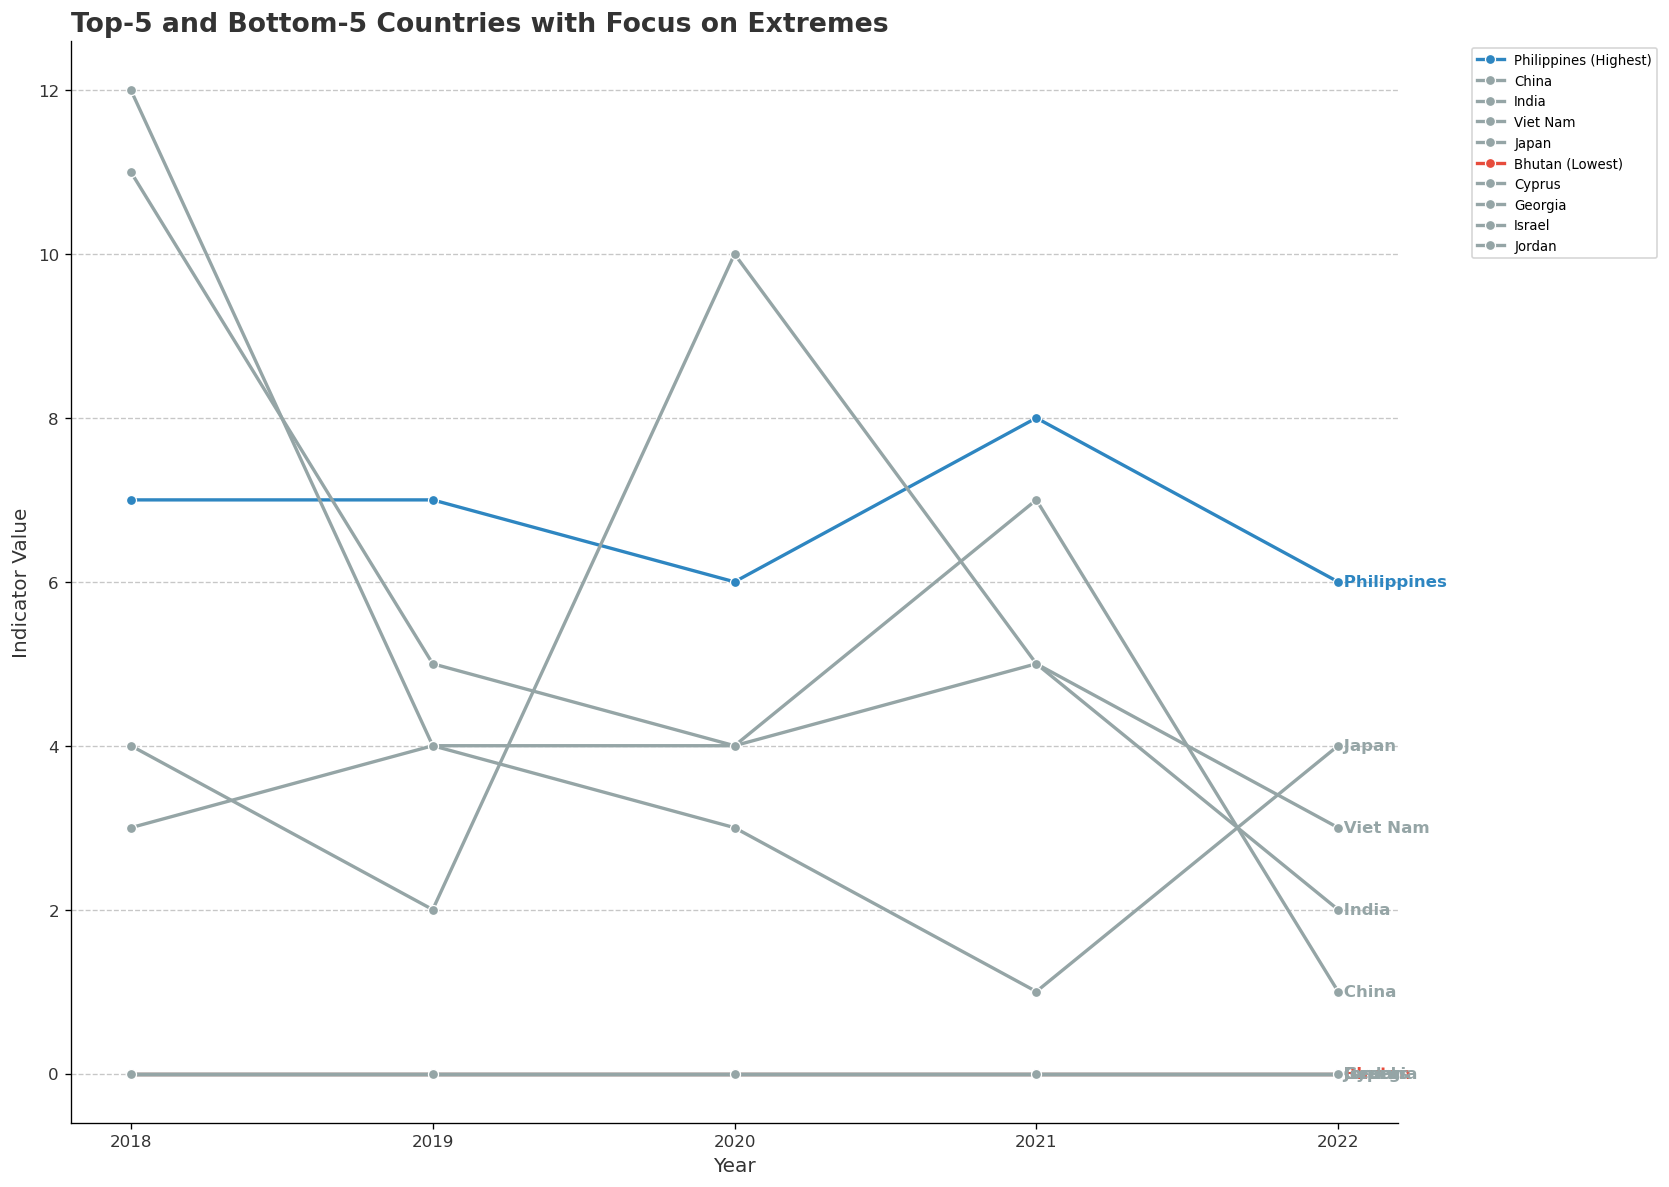

In [44]:
visualize_top_bottom_k_line_plot(Storm, 5)

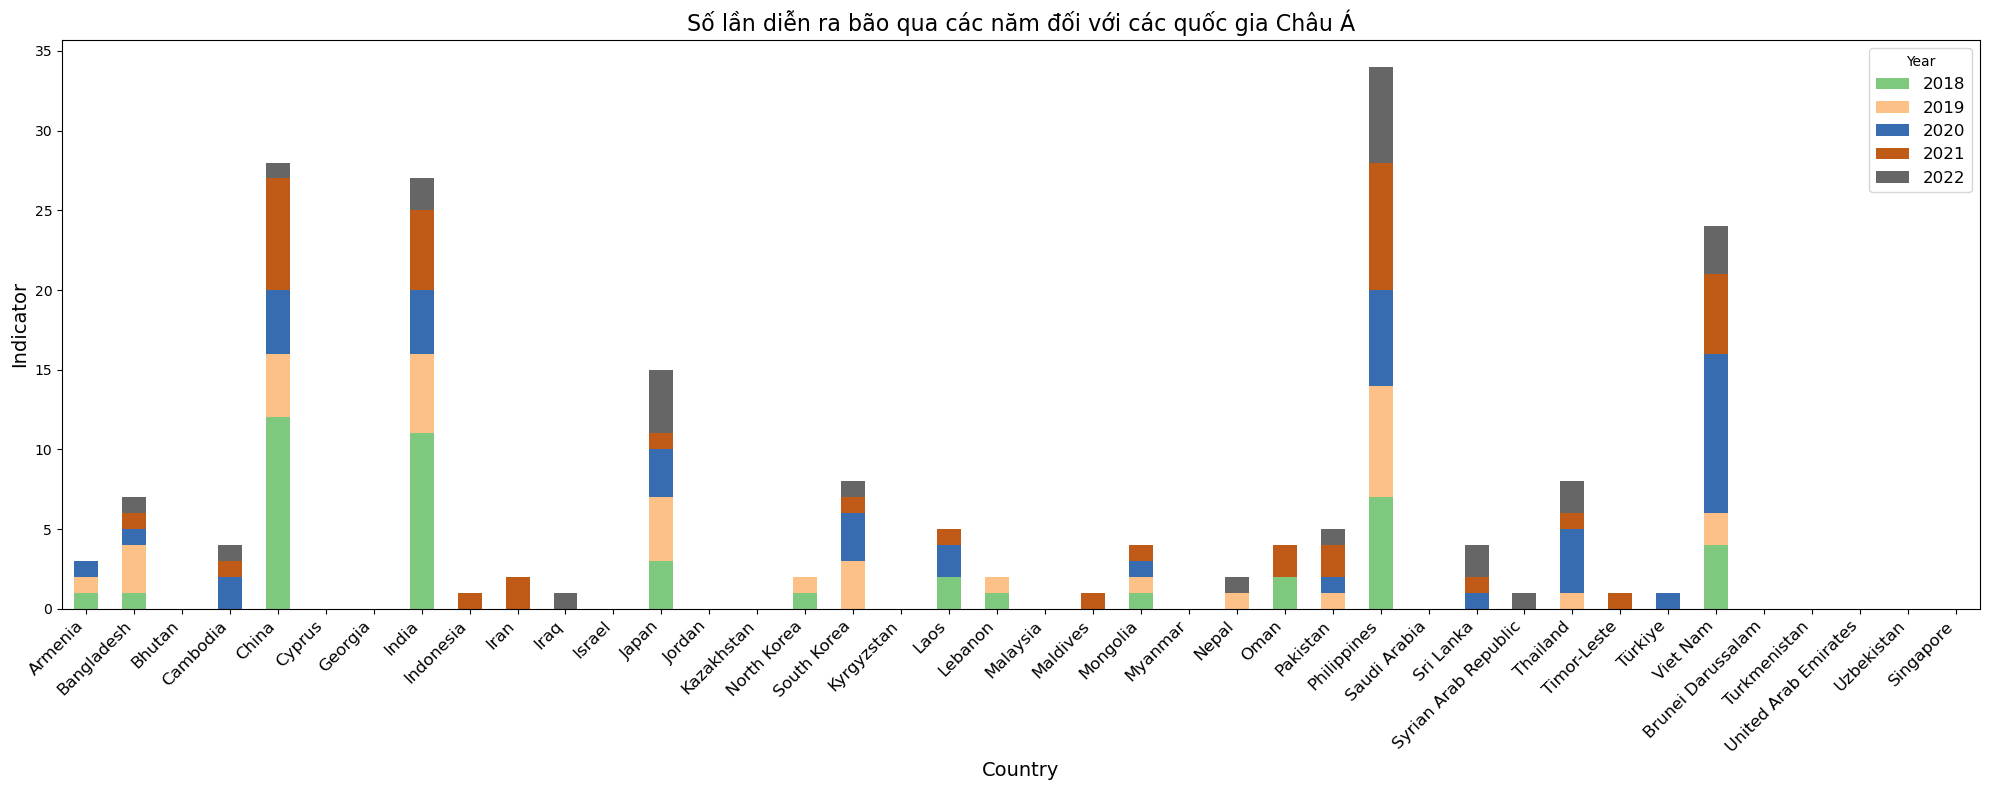

In [45]:
title = "Số lần diễn ra bão qua các năm đối với các quốc gia Châu Á"
visualize_change_stacked_bar_plot(Storm, title)

## Drought

In [46]:
Drought = cdf[cdf['Indicator']=='Drought']
Drought

Country ISO3 Indicator       Unit  2018  2019  2020  2021  \
0                 Armenia  ARM   Drought  Number of   0.0   0.0   0.0   0.0   
6              Bangladesh  BGD   Drought  Number of   0.0   0.0   0.0   0.0   
18               Cambodia  KHM   Drought  Number of   0.0   0.0   0.0   0.0   
22                  China  CHN   Drought  Number of   0.0   0.0   0.0   1.0   
29                 Cyprus  CYP   Drought  Number of   0.0   0.0   0.0   0.0   
34                Georgia  GEO   Drought  Number of   0.0   0.0   0.0   0.0   
38                  India  IND   Drought  Number of   1.0   0.0   0.0   0.0   
45              Indonesia  IDN   Drought  Number of   0.0   0.0   0.0   0.0   
51                   Iran  IRN   Drought  Number of   0.0   0.0   0.0   1.0   
57                   Iraq  IRQ   Drought  Number of   0.0   0.0   0.0   1.0   
61                 Israel  ISR   Drought  Number of   0.0   0.0   0.0   0.0   
73                 Jordan  JOR   Drought  Number of   0.0   0.0   0.0   0.0   
78             Kazakhstan  KAZ   Drought  Number of   0.0   0.0   0.0   1.0   
85            North Korea  PRK   Drought  Number of   0.0   1.0   0.0   0.0   
90            South Korea  KOR   Drought  Number of   0.0   0.0   0.0   0.0   
97             Kyrgyzstan  KGZ   Drought  Number of   0.0   0.0   0.0   0.0   
103                  Laos  LAO   Drought  Number of   0.0   1.0   0.0   0.0   
112              Malaysia  MYS   Drought  Number of   0.0   0.0   0.0   0.0   
121              Mongolia  MNG   Drought  Number of   0.0   0.0   0.0   0.0   
133                 Nepal  NPL   Drought  Number of   0.0   0.0   0.0   0.0   
143              Pakistan  PAK   Drought  Number of   0.0   1.0   0.0   0.0   
150           Philippines  PHL   Drought  Number of   0.0   1.0   0.0   0.0   
159             Sri Lanka  LKA   Drought  Number of   0.0   1.0   0.0   0.0   
164  Syrian Arab Republic  SYR   Drought  Number of   0.0   0.0   0.0   1.0   
170              Thailand  THA   Drought  Number of   0.0   1.0   0.0   0.0   
177           Timor-Leste  TLS   Drought  Number of   0.0   0.0   0.0   0.0   
191            Uzbekistan  UZB   Drought  Number of   0.0   0.0   0.0   0.0   
195              Viet Nam  VNM   Drought  Number of   0.0   1.0   0.0   0.0   
205                Bhutan  BTN   Drought  Number of   0.0   0.0   0.0   0.0   
210     Brunei Darussalam  BRN   Drought  Number of   0.0   0.0   0.0   0.0   
225                 Japan  JPN   Drought  Number of   0.0   0.0   0.0   0.0   
235               Lebanon  LBN   Drought  Number of   0.0   0.0   0.0   0.0   
237              Maldives  MDV   Drought  Number of   0.0   0.0   0.0   0.0   
242               Myanmar  MMR   Drought  Number of   0.0   0.0   0.0   0.0   
243                  Oman  OMN   Drought  Number of   0.0   0.0   0.0   0.0   
248          Saudi Arabia  SAU   Drought  Number of   0.0   0.0   0.0   0.0   
258               Türkiye  TUR   Drought  Number of   0.0   0.0   0.0   0.0   
263          Turkmenistan  TKM   Drought  Number of   0.0   0.0   0.0   0.0   
268  United Arab Emirates  ARE   Drought  Number of   0.0   0.0   0.0   0.0   
273             Singapore  SGP   Drought  Number of   0.0   0.0   0.0   0.0   

     2022  
0     0.0  
6     0.0  
18    0.0  
22    1.0  
29    0.0  
34    0.0  
38    0.0  
45    0.0  
51    0.0  
57    0.0  
61    0.0  
73    0.0  
78    0.0  
85    0.0  
90    0.0  
97    0.0  
103   0.0  
112   0.0  
121   0.0  
133   0.0  
143   0.0  
150   0.0  
159   0.0  
164   0.0  
170   0.0  
177   0.0  
191   0.0  
195   0.0  
205   0.0  
210   0.0  
225   0.0  
235   0.0  
237   0.0  
242   0.0  
243   0.0  
248   0.0  
258   0.0  
263   0.0  
268   0.0  
273   0.0

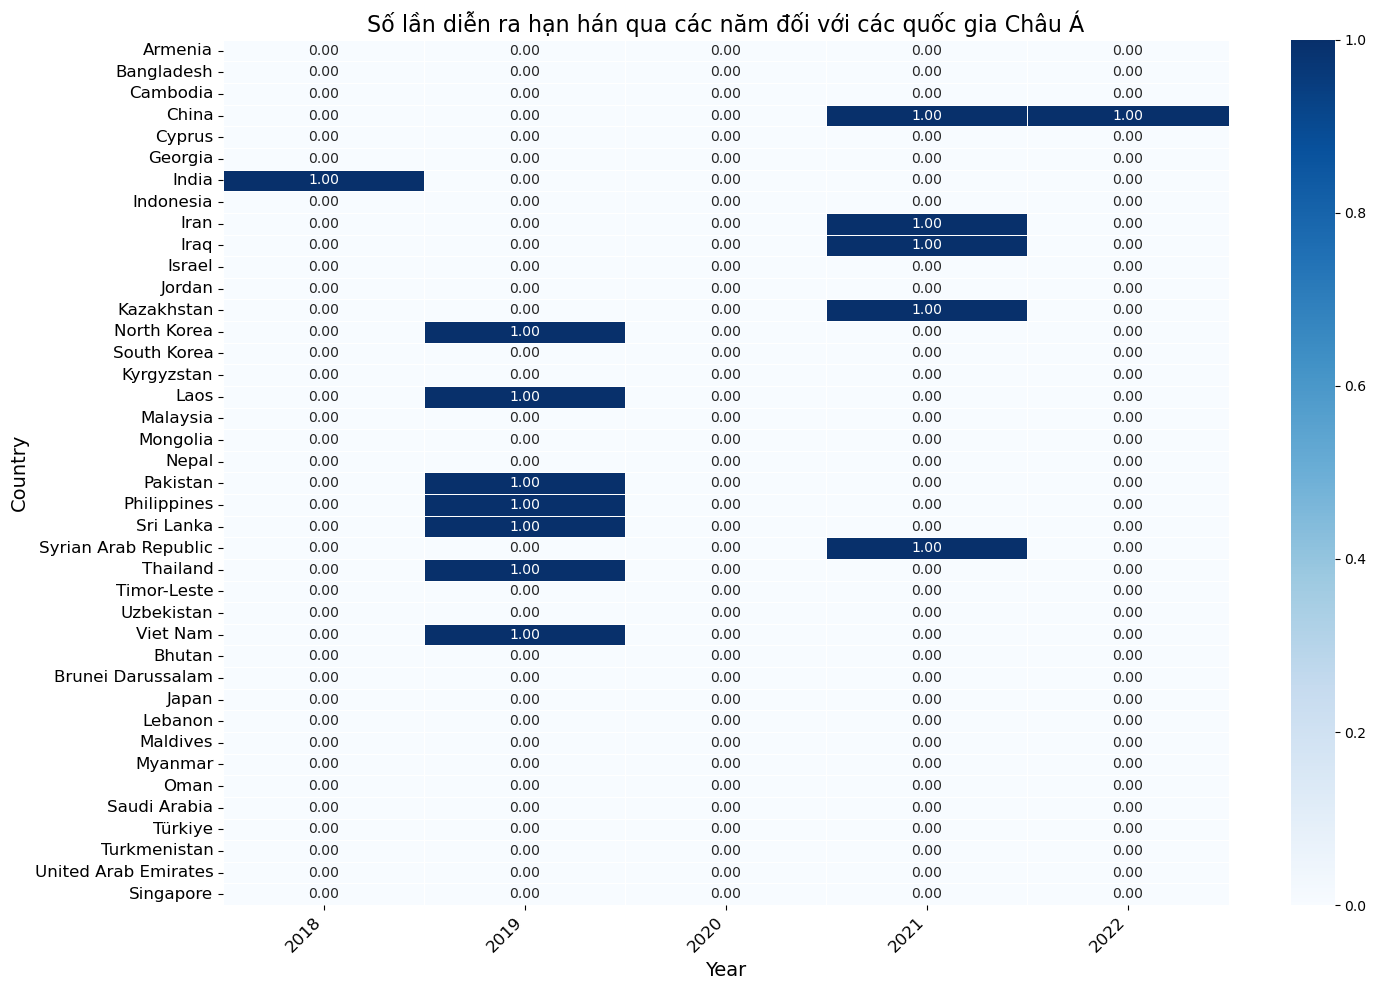

In [47]:
title = "Số lần diễn ra hạn hán qua các năm đối với các quốc gia Châu Á"
visualize_change_heatmap(Drought, title)

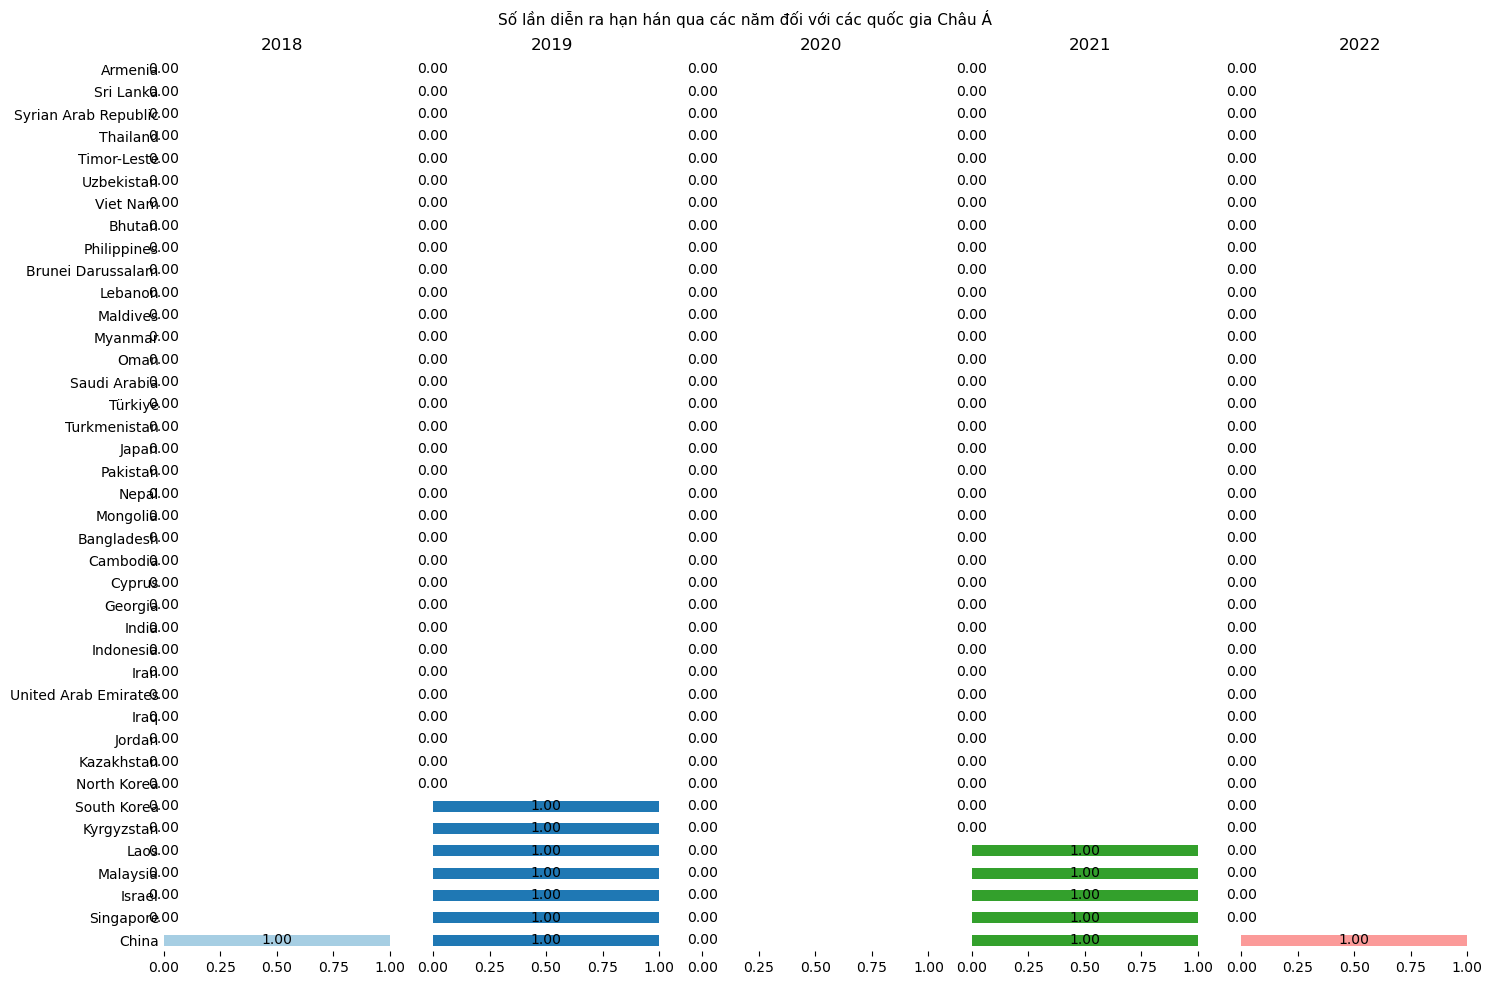

In [48]:
title="Số lần diễn ra hạn hán qua các năm đối với các quốc gia Châu Á"
visualize_change_panel_bar_plot(Drought, title)

Lấy Top3 nước có sự thay đổi nhiệt độ lớn nhất trong khu vực theo các năm

In [49]:
top_k_countries_by_year(Drought, k=3)

Top 3 countries for 2018:
Country: India, Value: 1.000
Country: Armenia, Value: 0.000
Country: Japan, Value: 0.000
----------------------------------------
Top 3 countries for 2019:
Country: Pakistan, Value: 1.000
Country: Philippines, Value: 1.000
Country: Thailand, Value: 1.000
----------------------------------------
Top 3 countries for 2020:
Country: Armenia, Value: 0.000
Country: Bangladesh, Value: 0.000
Country: Sri Lanka, Value: 0.000
----------------------------------------
Top 3 countries for 2021:
Country: Syrian Arab Republic, Value: 1.000
Country: China, Value: 1.000
Country: Iran, Value: 1.000
----------------------------------------
Top 3 countries for 2022:
Country: China, Value: 1.000
Country: Armenia, Value: 0.000
Country: Japan, Value: 0.000
----------------------------------------


In [50]:
bottom_k_countries_by_year(Drought, k=3)

Bottom 3 countries for 2018:
Country: Armenia, Value: 0.000
Country: Sri Lanka, Value: 0.000
Country: Syrian Arab Republic, Value: 0.000
----------------------------------------
Bottom 3 countries for 2019:
Country: Armenia, Value: 0.000
Country: United Arab Emirates, Value: 0.000
Country: Syrian Arab Republic, Value: 0.000
----------------------------------------
Bottom 3 countries for 2020:
Country: Armenia, Value: 0.000
Country: Sri Lanka, Value: 0.000
Country: Syrian Arab Republic, Value: 0.000
----------------------------------------
Bottom 3 countries for 2021:
Country: Armenia, Value: 0.000
Country: Philippines, Value: 0.000
Country: Sri Lanka, Value: 0.000
----------------------------------------
Bottom 3 countries for 2022:
Country: Armenia, Value: 0.000
Country: Sri Lanka, Value: 0.000
Country: Syrian Arab Republic, Value: 0.000
----------------------------------------


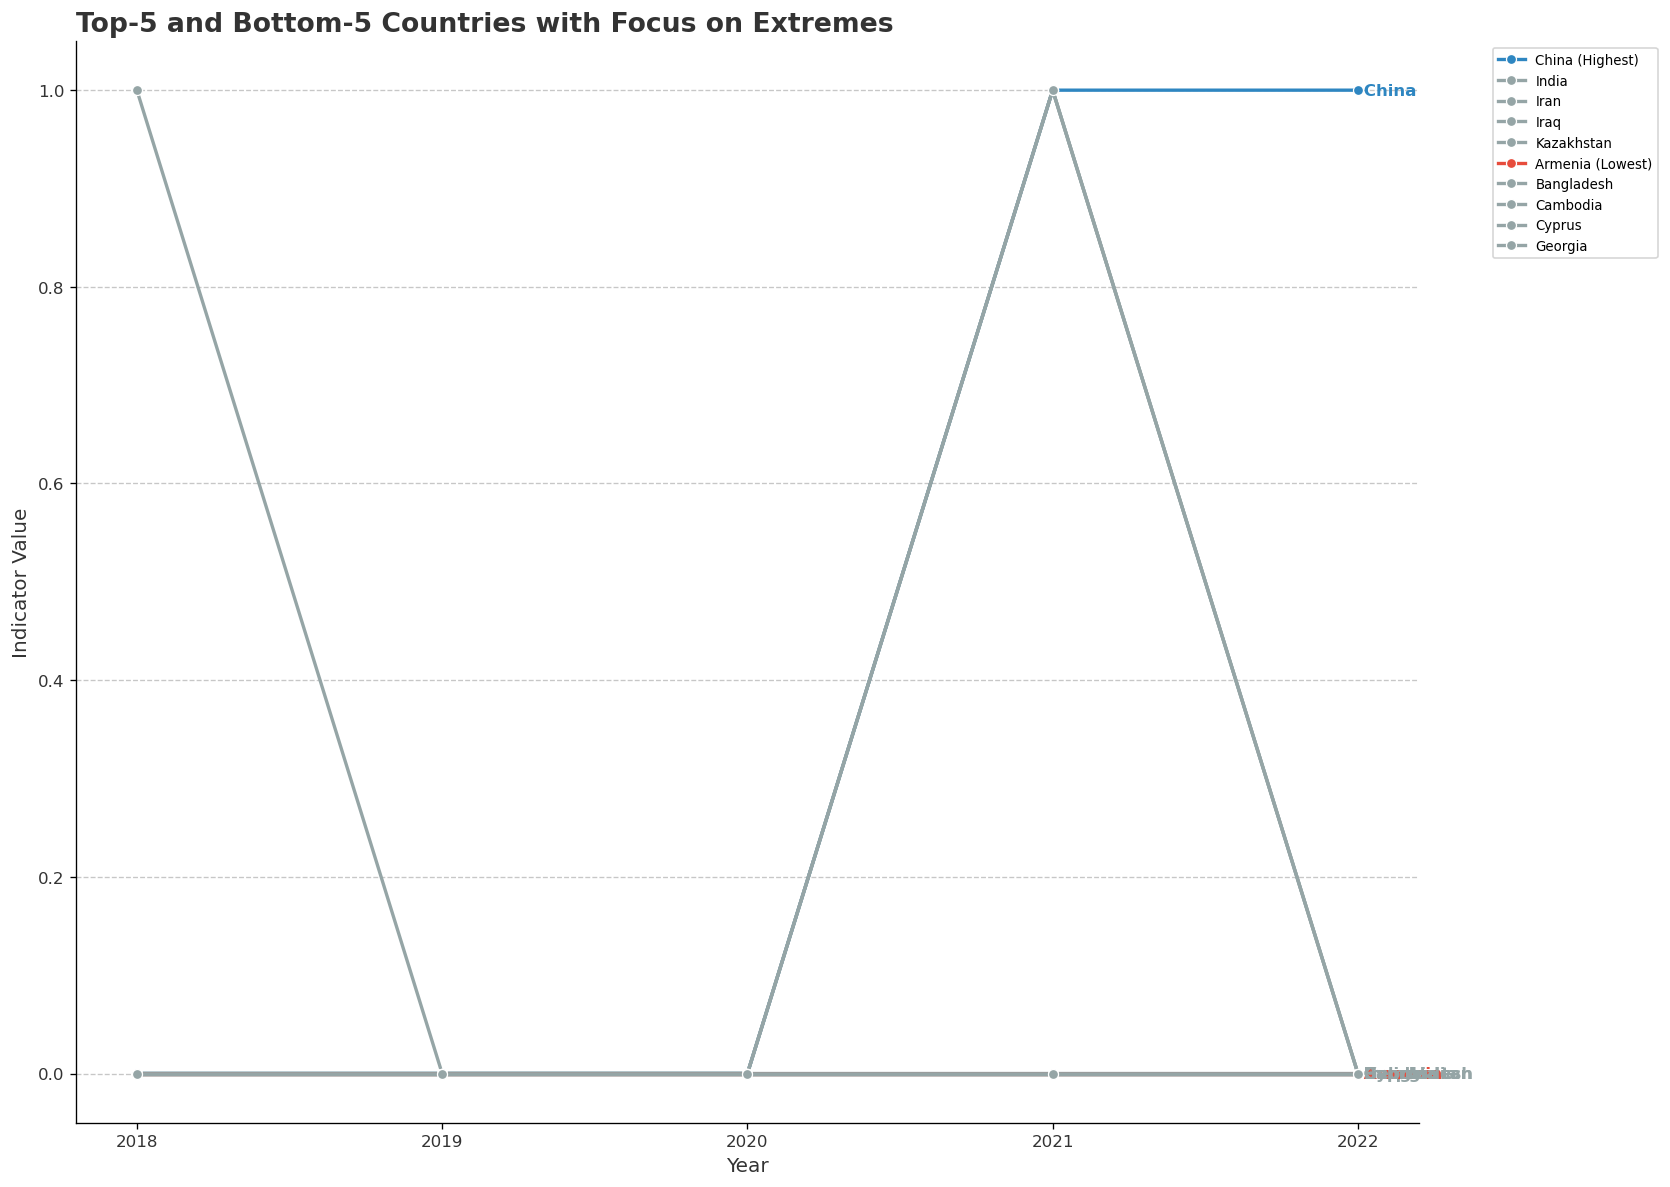

In [51]:
visualize_top_bottom_k_line_plot(Drought, 5)

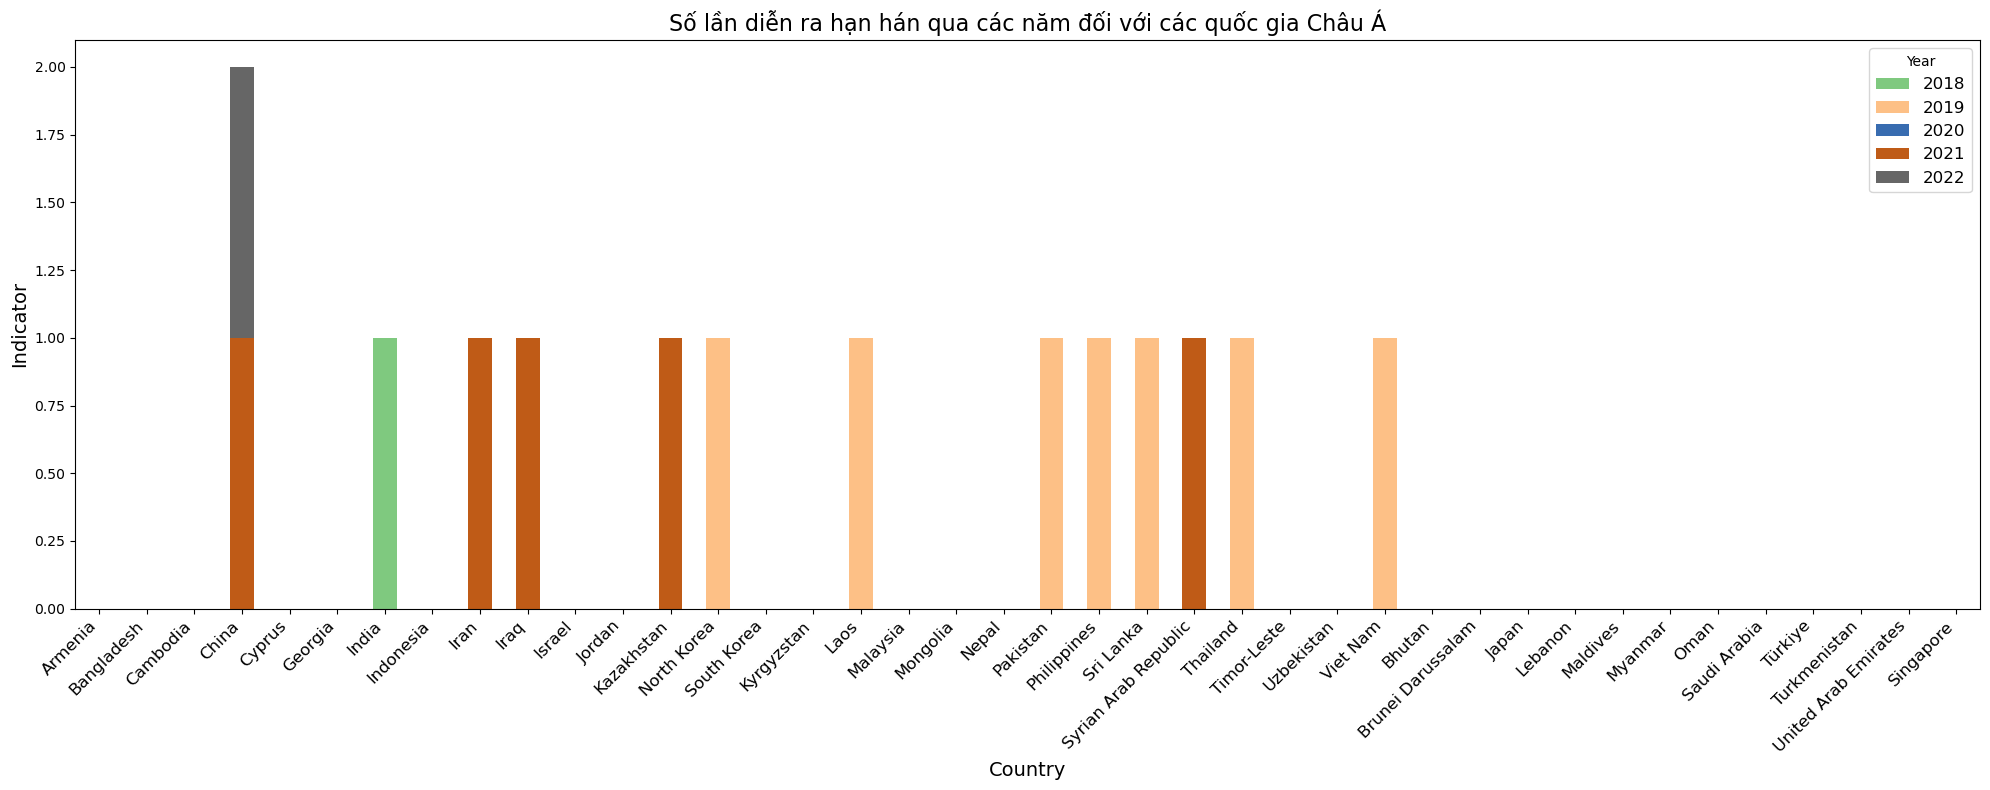

In [52]:
title = "Số lần diễn ra hạn hán qua các năm đối với các quốc gia Châu Á"
visualize_change_stacked_bar_plot(Drought, title)

## Landslide

In [53]:
Landslide = cdf[cdf['Indicator']=='Landslide']
Landslide

Country ISO3  Indicator       Unit  2018  2019  2020  2021  \
3                 Armenia  ARM  Landslide  Number of   0.0   0.0   0.0   0.0   
9              Bangladesh  BGD  Landslide  Number of   0.0   1.0   0.0   0.0   
25                  China  CHN  Landslide  Number of   0.0   2.0   1.0   0.0   
41                  India  IND  Landslide  Number of   0.0   0.0   2.0   2.0   
47              Indonesia  IDN  Landslide  Number of   2.0   2.0   1.0   2.0   
53                   Iran  IRN  Landslide  Number of   0.0   0.0   1.0   0.0   
69                  Japan  JPN  Landslide  Number of   0.0   0.0   0.0   1.0   
81             Kazakhstan  KAZ  Landslide  Number of   0.0   0.0   0.0   0.0   
93            South Korea  KOR  Landslide  Number of   0.0   0.0   0.0   0.0   
100            Kyrgyzstan  KGZ  Landslide  Number of   0.0   0.0   0.0   1.0   
114              Malaysia  MYS  Landslide  Number of   0.0   0.0   0.0   0.0   
124              Mongolia  MNG  Landslide  Number of   0.0   0.0   0.0   0.0   
129               Myanmar  MMR  Landslide  Number of   1.0   1.0   1.0   0.0   
136                 Nepal  NPL  Landslide  Number of   0.0   0.0   0.0   0.0   
146              Pakistan  PAK  Landslide  Number of   0.0   0.0   1.0   0.0   
152           Philippines  PHL  Landslide  Number of   0.0   0.0   1.0   0.0   
161             Sri Lanka  LKA  Landslide  Number of   0.0   0.0   0.0   0.0   
166  Syrian Arab Republic  SYR  Landslide  Number of   0.0   0.0   0.0   0.0   
173              Thailand  THA  Landslide  Number of   0.0   0.0   0.0   0.0   
183               Türkiye  TUR  Landslide  Number of   1.0   0.0   1.0   0.0   
193            Uzbekistan  UZB  Landslide  Number of   0.0   0.0   0.0   1.0   
197              Viet Nam  VNM  Landslide  Number of   0.0   0.0   0.0   0.0   
204                Bhutan  BTN  Landslide  Number of   0.0   0.0   0.0   0.0   
207     Brunei Darussalam  BRN  Landslide  Number of   0.0   0.0   0.0   0.0   
212              Cambodia  KHM  Landslide  Number of   0.0   0.0   0.0   0.0   
215                Cyprus  CYP  Landslide  Number of   0.0   0.0   0.0   0.0   
217               Georgia  GEO  Landslide  Number of   0.0   0.0   0.0   0.0   
222                  Iraq  IRQ  Landslide  Number of   0.0   0.0   0.0   0.0   
224                Israel  ISR  Landslide  Number of   0.0   0.0   0.0   0.0   
226                Jordan  JOR  Landslide  Number of   0.0   0.0   0.0   0.0   
228           North Korea  PRK  Landslide  Number of   0.0   0.0   0.0   0.0   
232                  Laos  LAO  Landslide  Number of   0.0   0.0   0.0   0.0   
234               Lebanon  LBN  Landslide  Number of   0.0   0.0   0.0   0.0   
239              Maldives  MDV  Landslide  Number of   0.0   0.0   0.0   0.0   
245                  Oman  OMN  Landslide  Number of   0.0   0.0   0.0   0.0   
250          Saudi Arabia  SAU  Landslide  Number of   0.0   0.0   0.0   0.0   
256           Timor-Leste  TLS  Landslide  Number of   0.0   0.0   0.0   0.0   
259          Turkmenistan  TKM  Landslide  Number of   0.0   0.0   0.0   0.0   
264  United Arab Emirates  ARE  Landslide  Number of   0.0   0.0   0.0   0.0   
276             Singapore  SGP  Landslide  Number of   0.0   0.0   0.0   0.0   

     2022  
3     0.0  
9     0.0  
25    1.0  
41    1.0  
47    0.0  
53    0.0  
69    0.0  
81    0.0  
93    0.0  
100   0.0  
114   1.0  
124   0.0  
129   0.0  
136   1.0  
146   0.0  
152   1.0  
161   0.0  
166   0.0  
173   0.0  
183   0.0  
193   0.0  
197   0.0  
204   0.0  
207   0.0  
212   0.0  
215   0.0  
217   0.0  
222   0.0  
224   0.0  
226   0.0  
228   0.0  
232   0.0  
234   0.0  
239   0.0  
245   0.0  
250   0.0  
256   0.0  
259   0.0  
264   0.0  
276   0.0

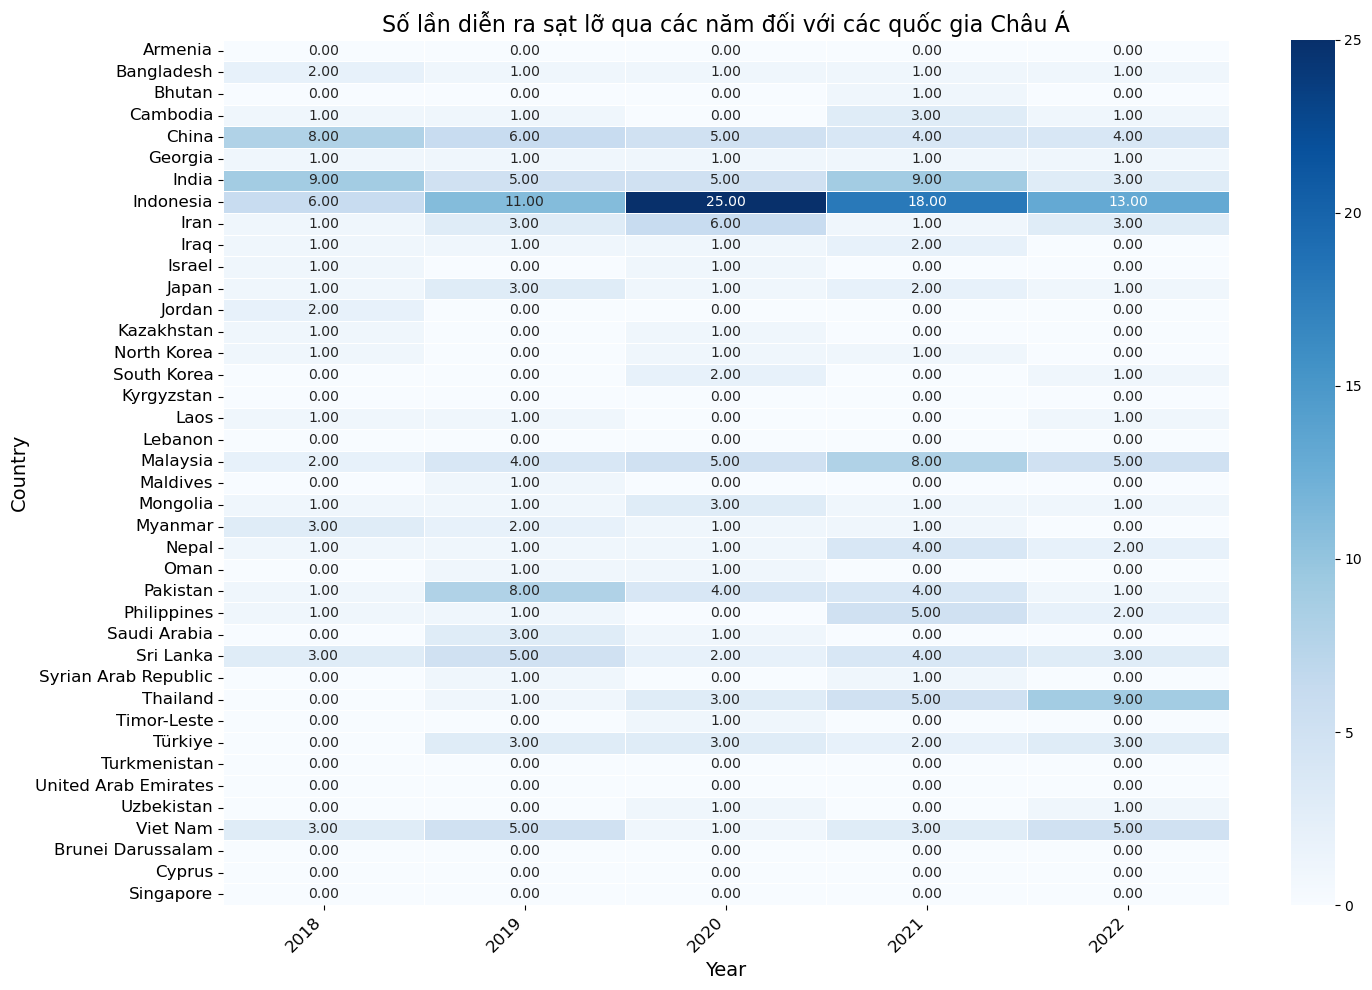

In [54]:
title = "Số lần diễn ra sạt lỡ qua các năm đối với các quốc gia Châu Á"
visualize_change_heatmap(flood, title)

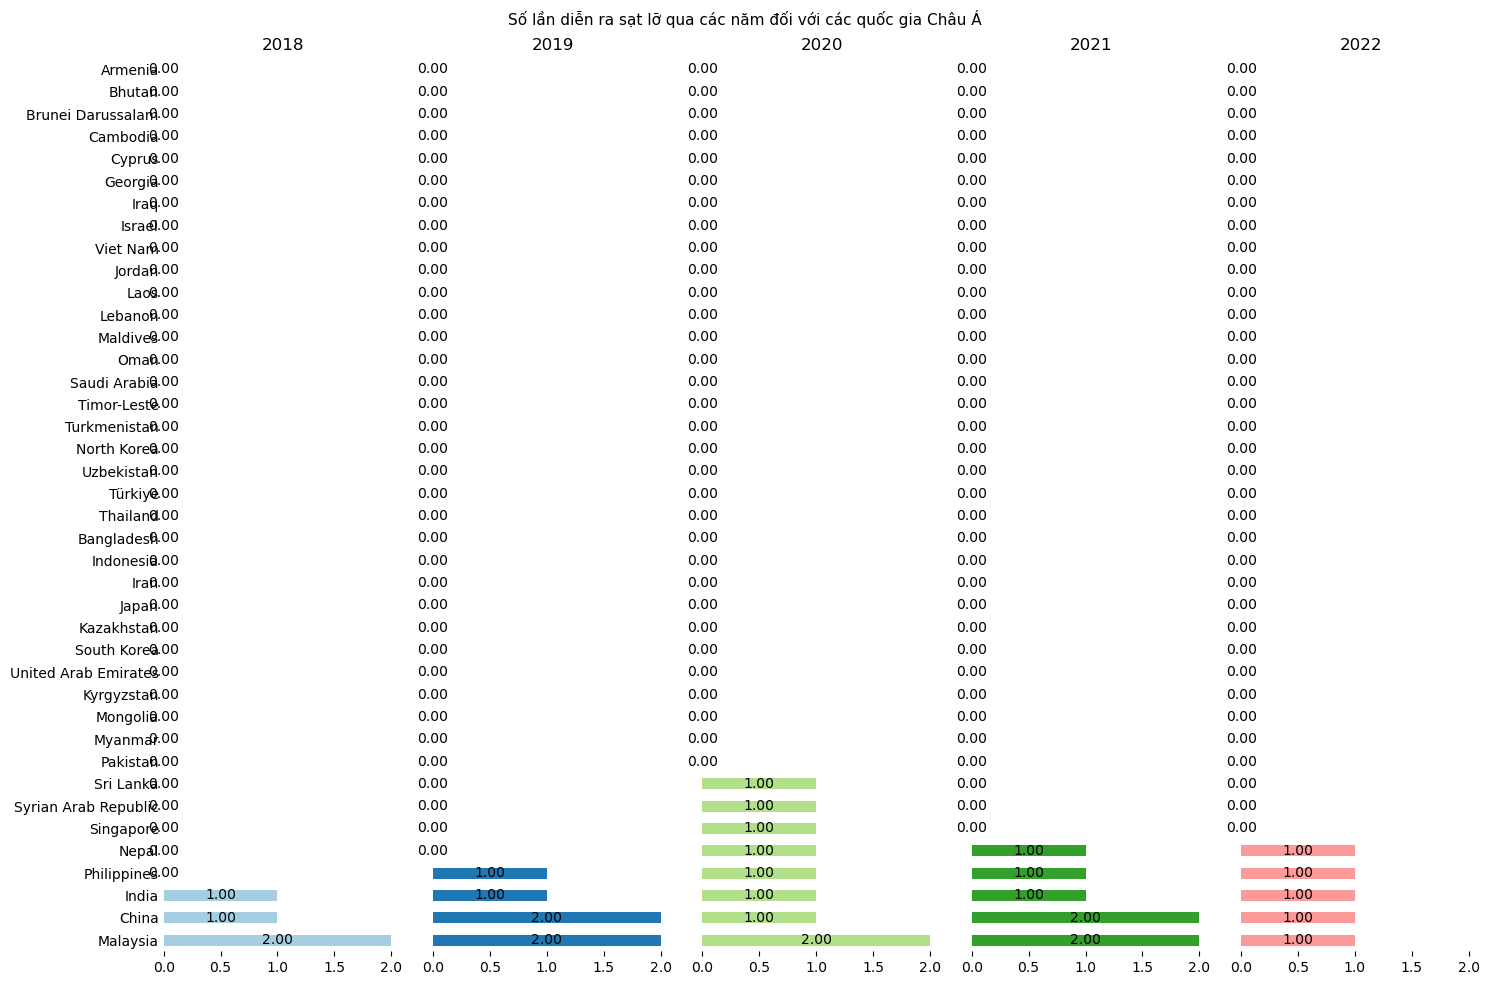

In [55]:
title="Số lần diễn ra sạt lỡ qua các năm đối với các quốc gia Châu Á"
visualize_change_panel_bar_plot(Landslide, title)

Lấy Top3 nước có sự thay đổi nhiệt độ lớn nhất trong khu vực theo các năm

In [56]:
top_k_countries_by_year(Landslide, k=3)

Top 3 countries for 2018:
Country: Indonesia, Value: 2.000
Country: Türkiye, Value: 1.000
Country: Myanmar, Value: 1.000
----------------------------------------
Top 3 countries for 2019:
Country: China, Value: 2.000
Country: Indonesia, Value: 2.000
Country: Myanmar, Value: 1.000
----------------------------------------
Top 3 countries for 2020:
Country: India, Value: 2.000
Country: Myanmar, Value: 1.000
Country: Pakistan, Value: 1.000
----------------------------------------
Top 3 countries for 2021:
Country: India, Value: 2.000
Country: Indonesia, Value: 2.000
Country: Uzbekistan, Value: 1.000
----------------------------------------
Top 3 countries for 2022:
Country: Nepal, Value: 1.000
Country: China, Value: 1.000
Country: India, Value: 1.000
----------------------------------------


In [57]:
bottom_k_countries_by_year(Landslide, k=3)

Bottom 3 countries for 2018:
Country: Armenia, Value: 0.000
Country: Bhutan, Value: 0.000
Country: Brunei Darussalam, Value: 0.000
----------------------------------------
Bottom 3 countries for 2019:
Country: Armenia, Value: 0.000
Country: Bhutan, Value: 0.000
Country: Brunei Darussalam, Value: 0.000
----------------------------------------
Bottom 3 countries for 2020:
Country: Armenia, Value: 0.000
Country: Bhutan, Value: 0.000
Country: Brunei Darussalam, Value: 0.000
----------------------------------------
Bottom 3 countries for 2021:
Country: Armenia, Value: 0.000
Country: Bhutan, Value: 0.000
Country: Brunei Darussalam, Value: 0.000
----------------------------------------
Bottom 3 countries for 2022:
Country: Armenia, Value: 0.000
Country: Bhutan, Value: 0.000
Country: Brunei Darussalam, Value: 0.000
----------------------------------------


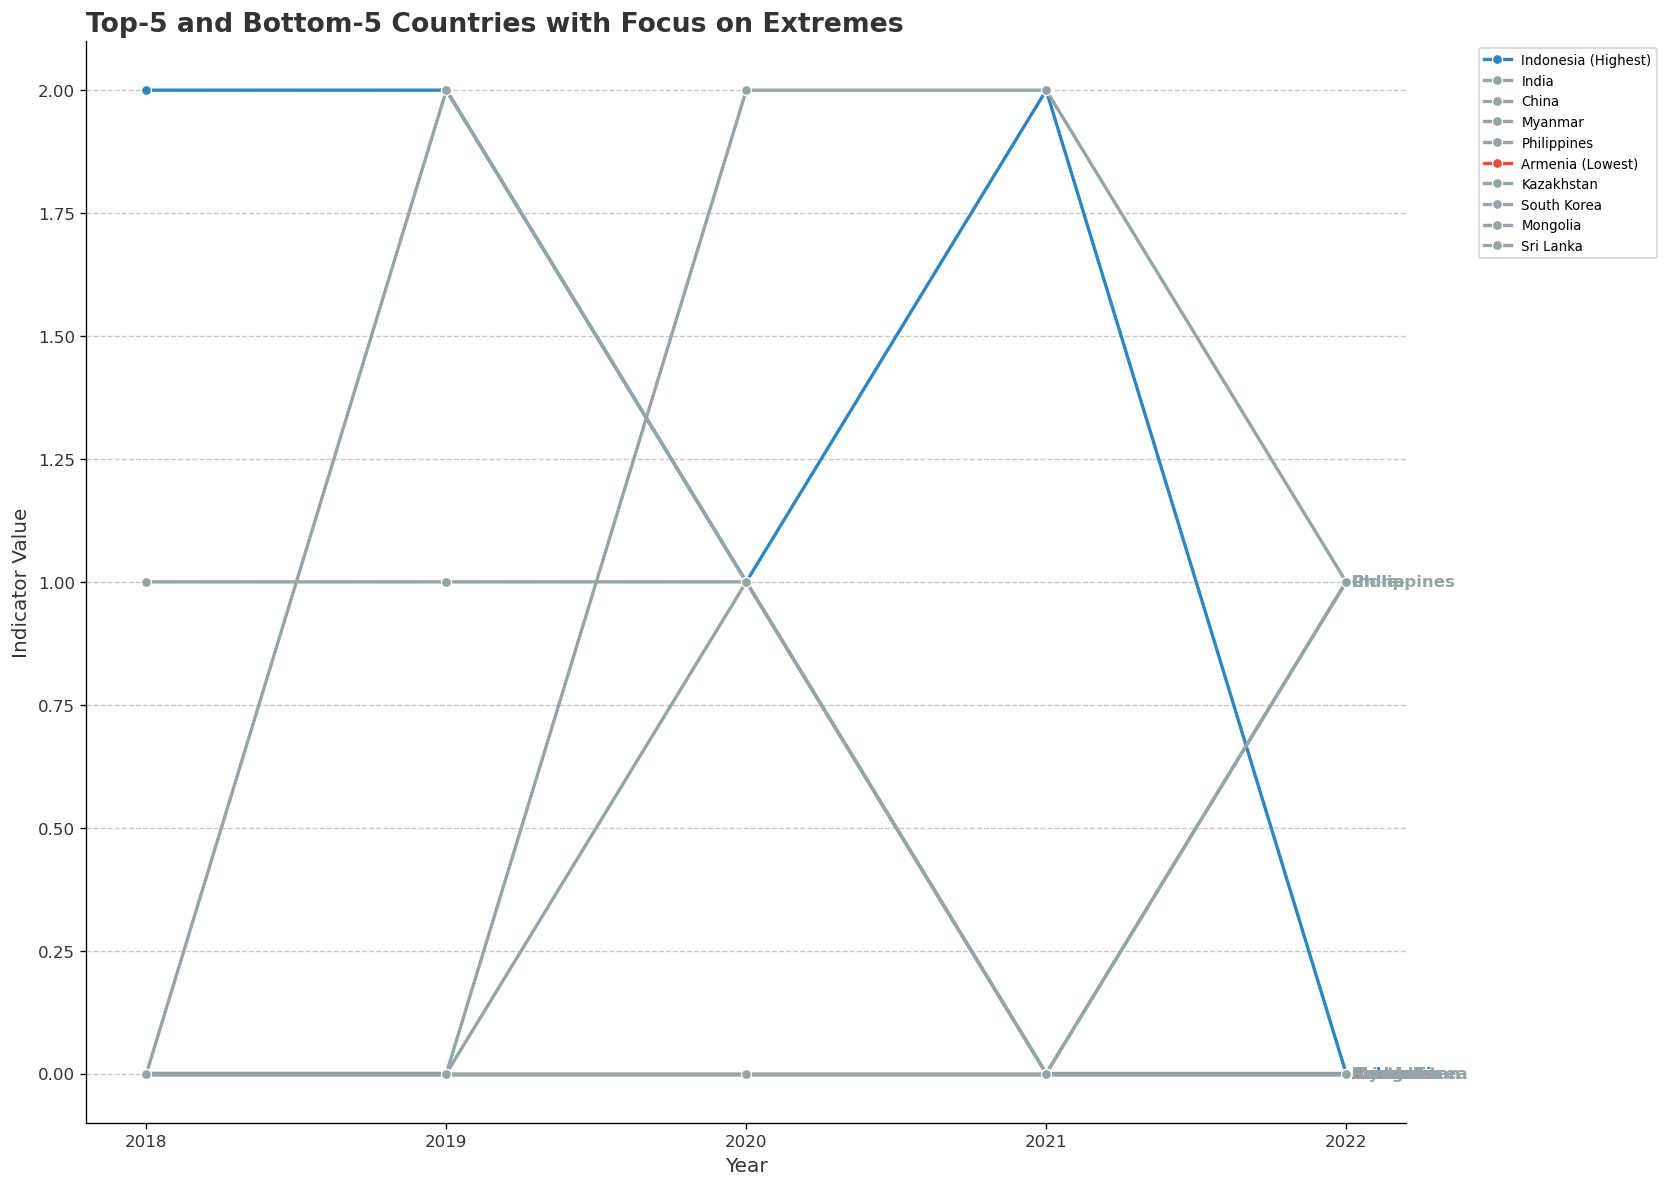

In [58]:
visualize_top_bottom_k_line_plot(Landslide, 5)

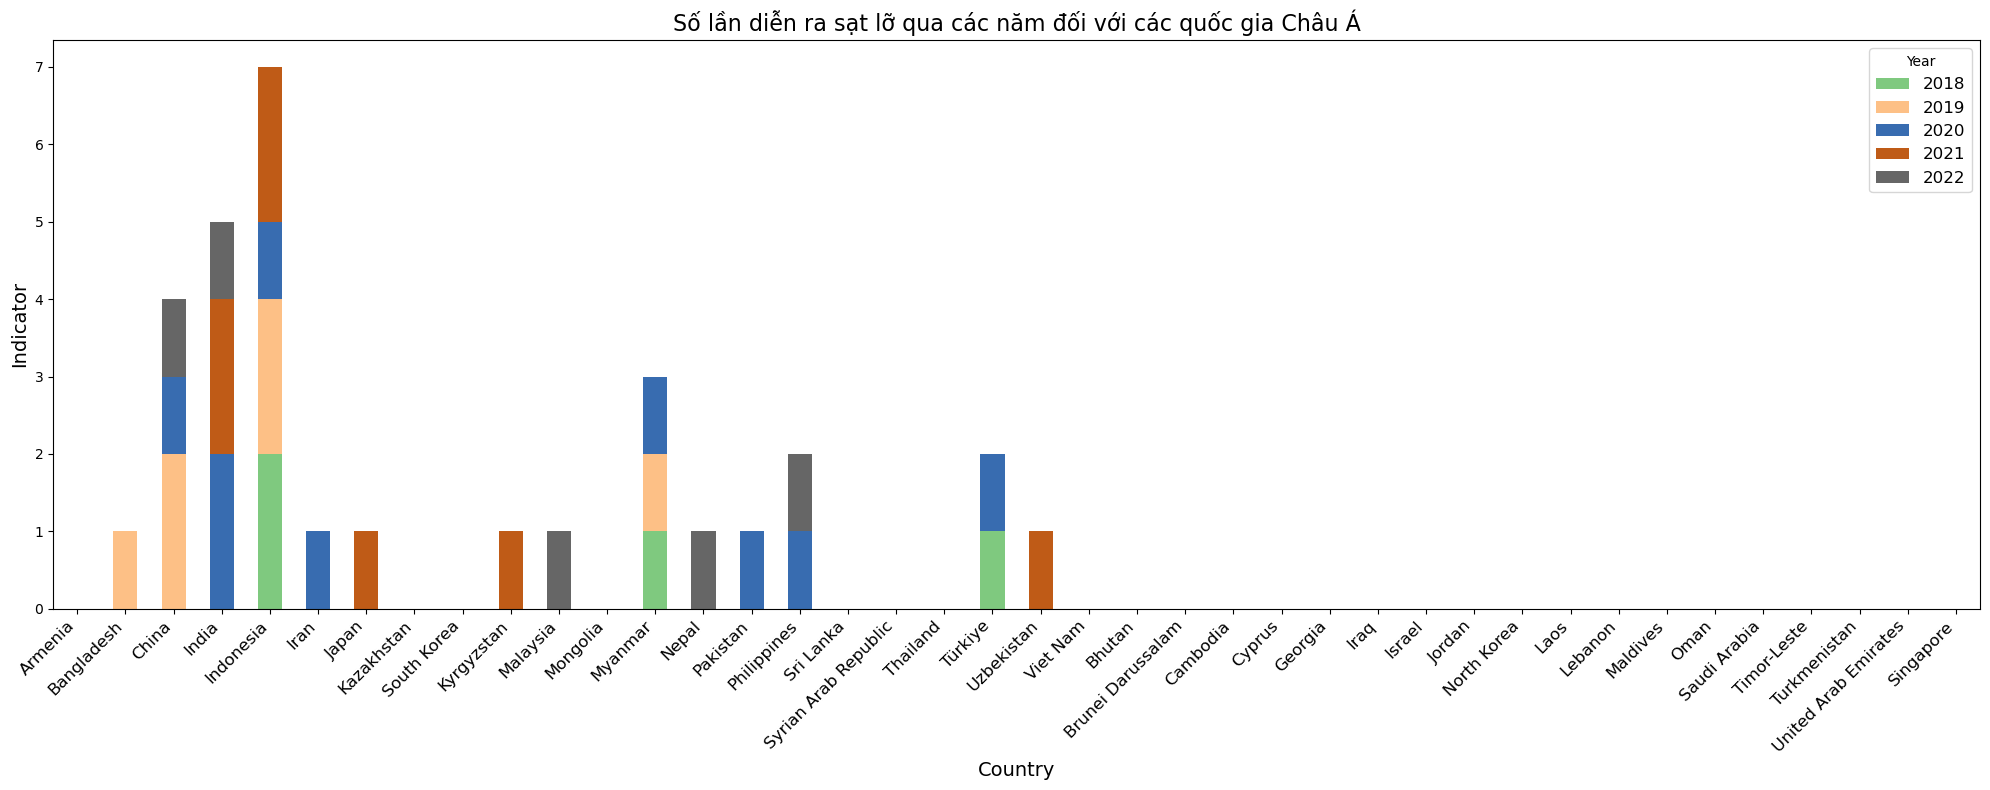

In [59]:
title = "Số lần diễn ra sạt lỡ qua các năm đối với các quốc gia Châu Á"
visualize_change_stacked_bar_plot(Landslide, title)

## Extreme temperature

In [60]:
Extreme_temperature = cdf[cdf['Indicator']=='Extreme temperature']
Extreme_temperature

Country ISO3            Indicator       Unit  2018  2019  \
1                 Armenia  ARM  Extreme temperature  Number of   0.0   0.0   
7              Bangladesh  BGD  Extreme temperature  Number of   1.0   1.0   
23                  China  CHN  Extreme temperature  Number of   0.0   0.0   
30                 Cyprus  CYP  Extreme temperature  Number of   0.0   0.0   
39                  India  IND  Extreme temperature  Number of   1.0   2.0   
62                 Israel  ISR  Extreme temperature  Number of   0.0   0.0   
67                  Japan  JPN  Extreme temperature  Number of   1.0   2.0   
74                 Jordan  JOR  Extreme temperature  Number of   0.0   0.0   
79             Kazakhstan  KAZ  Extreme temperature  Number of   0.0   0.0   
86            North Korea  PRK  Extreme temperature  Number of   1.0   0.0   
91            South Korea  KOR  Extreme temperature  Number of   1.0   0.0   
98             Kyrgyzstan  KGZ  Extreme temperature  Number of   0.0   0.0   
107               Lebanon  LBN  Extreme temperature  Number of   0.0   0.0   
122              Mongolia  MNG  Extreme temperature  Number of   1.0   1.0   
134                 Nepal  NPL  Extreme temperature  Number of   1.0   0.0   
144              Pakistan  PAK  Extreme temperature  Number of   1.0   0.0   
171              Thailand  THA  Extreme temperature  Number of   0.0   0.0   
181               Türkiye  TUR  Extreme temperature  Number of   0.0   0.0   
203                Bhutan  BTN  Extreme temperature  Number of   0.0   0.0   
209     Brunei Darussalam  BRN  Extreme temperature  Number of   0.0   0.0   
211              Cambodia  KHM  Extreme temperature  Number of   0.0   0.0   
216               Georgia  GEO  Extreme temperature  Number of   0.0   0.0   
219             Indonesia  IDN  Extreme temperature  Number of   0.0   0.0   
220                  Iran  IRN  Extreme temperature  Number of   0.0   0.0   
221                  Iraq  IRQ  Extreme temperature  Number of   0.0   0.0   
231                  Laos  LAO  Extreme temperature  Number of   0.0   0.0   
236              Malaysia  MYS  Extreme temperature  Number of   0.0   0.0   
238              Maldives  MDV  Extreme temperature  Number of   0.0   0.0   
241               Myanmar  MMR  Extreme temperature  Number of   0.0   0.0   
244                  Oman  OMN  Extreme temperature  Number of   0.0   0.0   
247           Philippines  PHL  Extreme temperature  Number of   0.0   0.0   
249          Saudi Arabia  SAU  Extreme temperature  Number of   0.0   0.0   
252             Sri Lanka  LKA  Extreme temperature  Number of   0.0   0.0   
254  Syrian Arab Republic  SYR  Extreme temperature  Number of   0.0   0.0   
255           Timor-Leste  TLS  Extreme temperature  Number of   0.0   0.0   
262          Turkmenistan  TKM  Extreme temperature  Number of   0.0   0.0   
267  United Arab Emirates  ARE  Extreme temperature  Number of   0.0   0.0   
269            Uzbekistan  UZB  Extreme temperature  Number of   0.0   0.0   
272              Viet Nam  VNM  Extreme temperature  Number of   0.0   0.0   
274             Singapore  SGP  Extreme temperature  Number of   0.0   0.0   

     2020  2021  2022  
1     0.0   0.0   0.0  
7     0.0   0.0   0.0  
23    0.0   0.0   0.0  
30    0.0   0.0   0.0  
39    0.0   0.0   1.0  
62    0.0   0.0   0.0  
67    0.0   0.0   1.0  
74    0.0   0.0   0.0  
79    0.0   0.0   0.0  
86    0.0   0.0   0.0  
91    0.0   0.0   1.0  
98    0.0   0.0   1.0  
107   0.0   0.0   0.0  
122   0.0   0.0   1.0  
134   0.0   0.0   0.0  
144   0.0   0.0   1.0  
171   0.0   0.0   0.0  
181   0.0   0.0   0.0  
203   0.0   0.0   0.0  
209   0.0   0.0   0.0  
211   0.0   0.0   0.0  
216   0.0   0.0   0.0  
219   0.0   0.0   0.0  
220   0.0   0.0   0.0  
221   0.0   0.0   0.0  
231   0.0   0.0   0.0  
236   0.0   0.0   0.0  
238   0.0   0.0   0.0  
241   0.0   0.0   0.0  
244   0.0   0.0   0.0  
247   0.0   0.0   0.0  
249   0.0   0.0   0.0  
252   0.0   0.0   0.0  
254

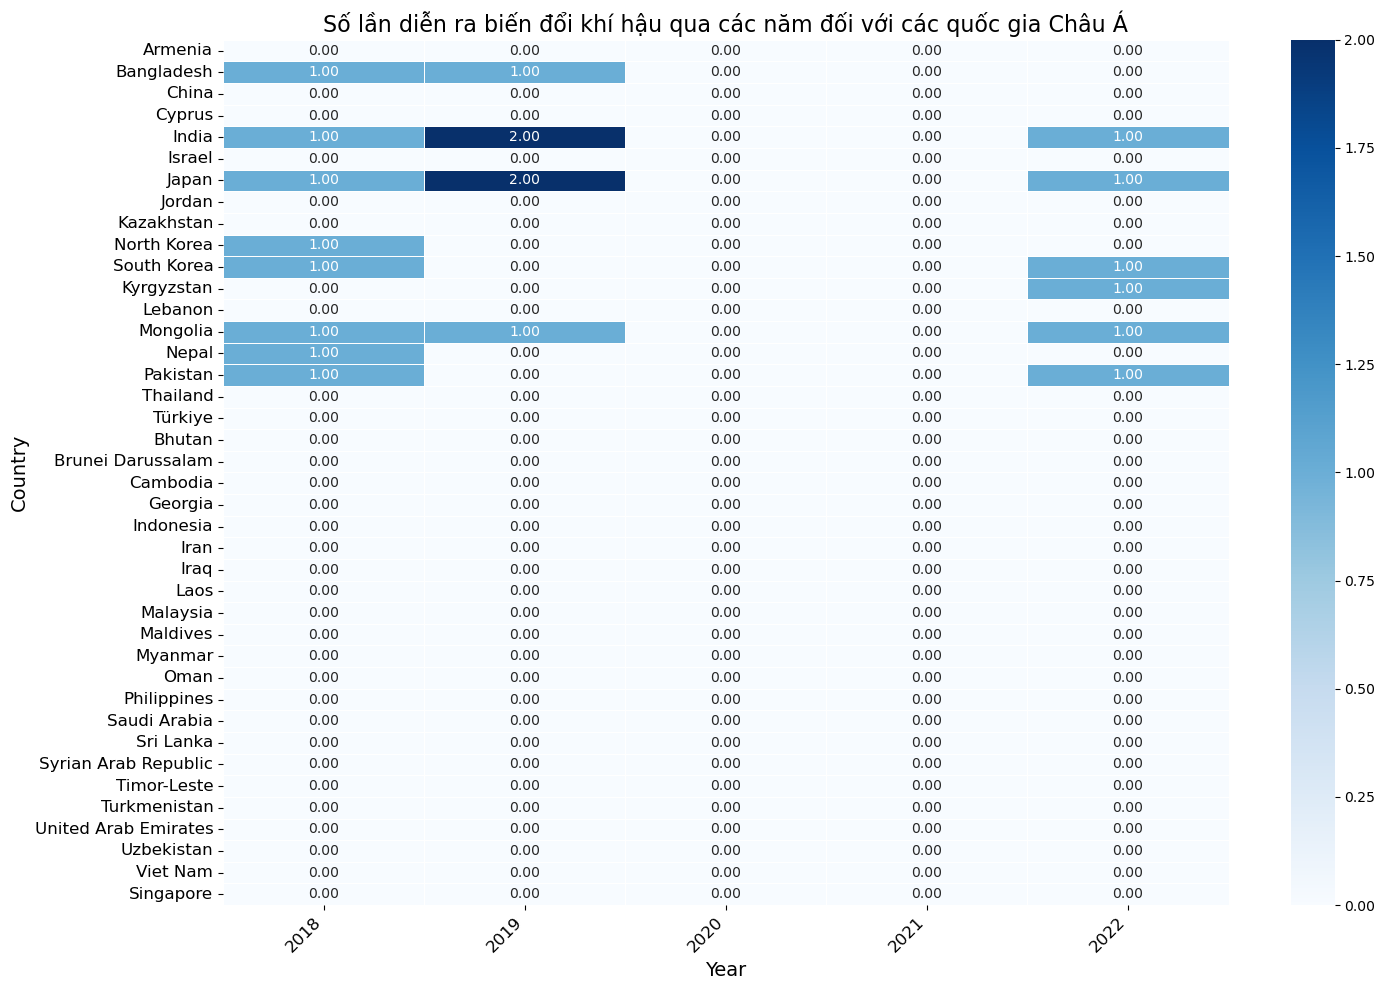

In [61]:
title = "Số lần diễn ra biến đổi khí hậu qua các năm đối với các quốc gia Châu Á"
visualize_change_heatmap(Extreme_temperature, title)

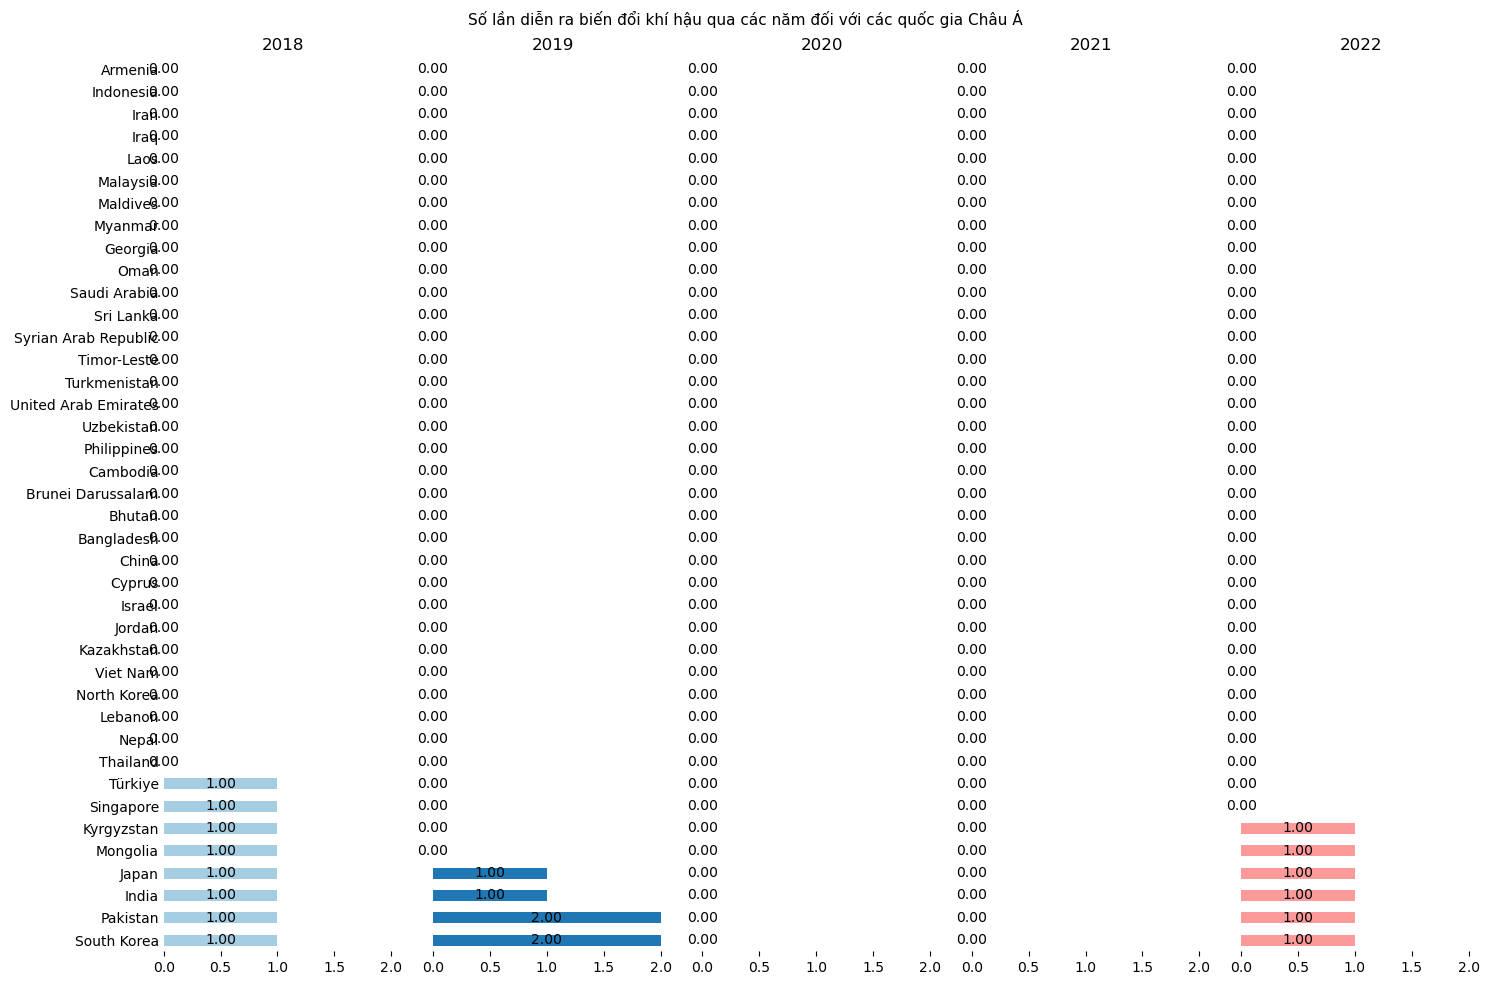

In [62]:
title="Số lần diễn ra biến đổi khí hậu qua các năm đối với các quốc gia Châu Á"
visualize_change_panel_bar_plot(Extreme_temperature, title)

Lấy Top3 nước có sự thay đổi nhiệt độ lớn nhất trong khu vực theo các năm

In [63]:
top_k_countries_by_year(Extreme_temperature, k=3)

Top 3 countries for 2018:
Country: Pakistan, Value: 1.000
Country: India, Value: 1.000
Country: Bangladesh, Value: 1.000
----------------------------------------
Top 3 countries for 2019:
Country: India, Value: 2.000
Country: Japan, Value: 2.000
Country: Bangladesh, Value: 1.000
----------------------------------------
Top 3 countries for 2020:
Country: Armenia, Value: 0.000
Country: Bangladesh, Value: 0.000
Country: Indonesia, Value: 0.000
----------------------------------------
Top 3 countries for 2021:
Country: Armenia, Value: 0.000
Country: Bangladesh, Value: 0.000
Country: Indonesia, Value: 0.000
----------------------------------------
Top 3 countries for 2022:
Country: Kyrgyzstan, Value: 1.000
Country: Mongolia, Value: 1.000
Country: India, Value: 1.000
----------------------------------------


In [64]:
bottom_k_countries_by_year(Extreme_temperature, k=3)

Bottom 3 countries for 2018:
Country: Armenia, Value: 0.000
Country: Indonesia, Value: 0.000
Country: Iran, Value: 0.000
----------------------------------------
Bottom 3 countries for 2019:
Country: Armenia, Value: 0.000
Country: Indonesia, Value: 0.000
Country: Iran, Value: 0.000
----------------------------------------
Bottom 3 countries for 2020:
Country: Armenia, Value: 0.000
Country: Indonesia, Value: 0.000
Country: Iran, Value: 0.000
----------------------------------------
Bottom 3 countries for 2021:
Country: Armenia, Value: 0.000
Country: Indonesia, Value: 0.000
Country: Iran, Value: 0.000
----------------------------------------
Bottom 3 countries for 2022:
Country: Armenia, Value: 0.000
Country: Indonesia, Value: 0.000
Country: Iran, Value: 0.000
----------------------------------------


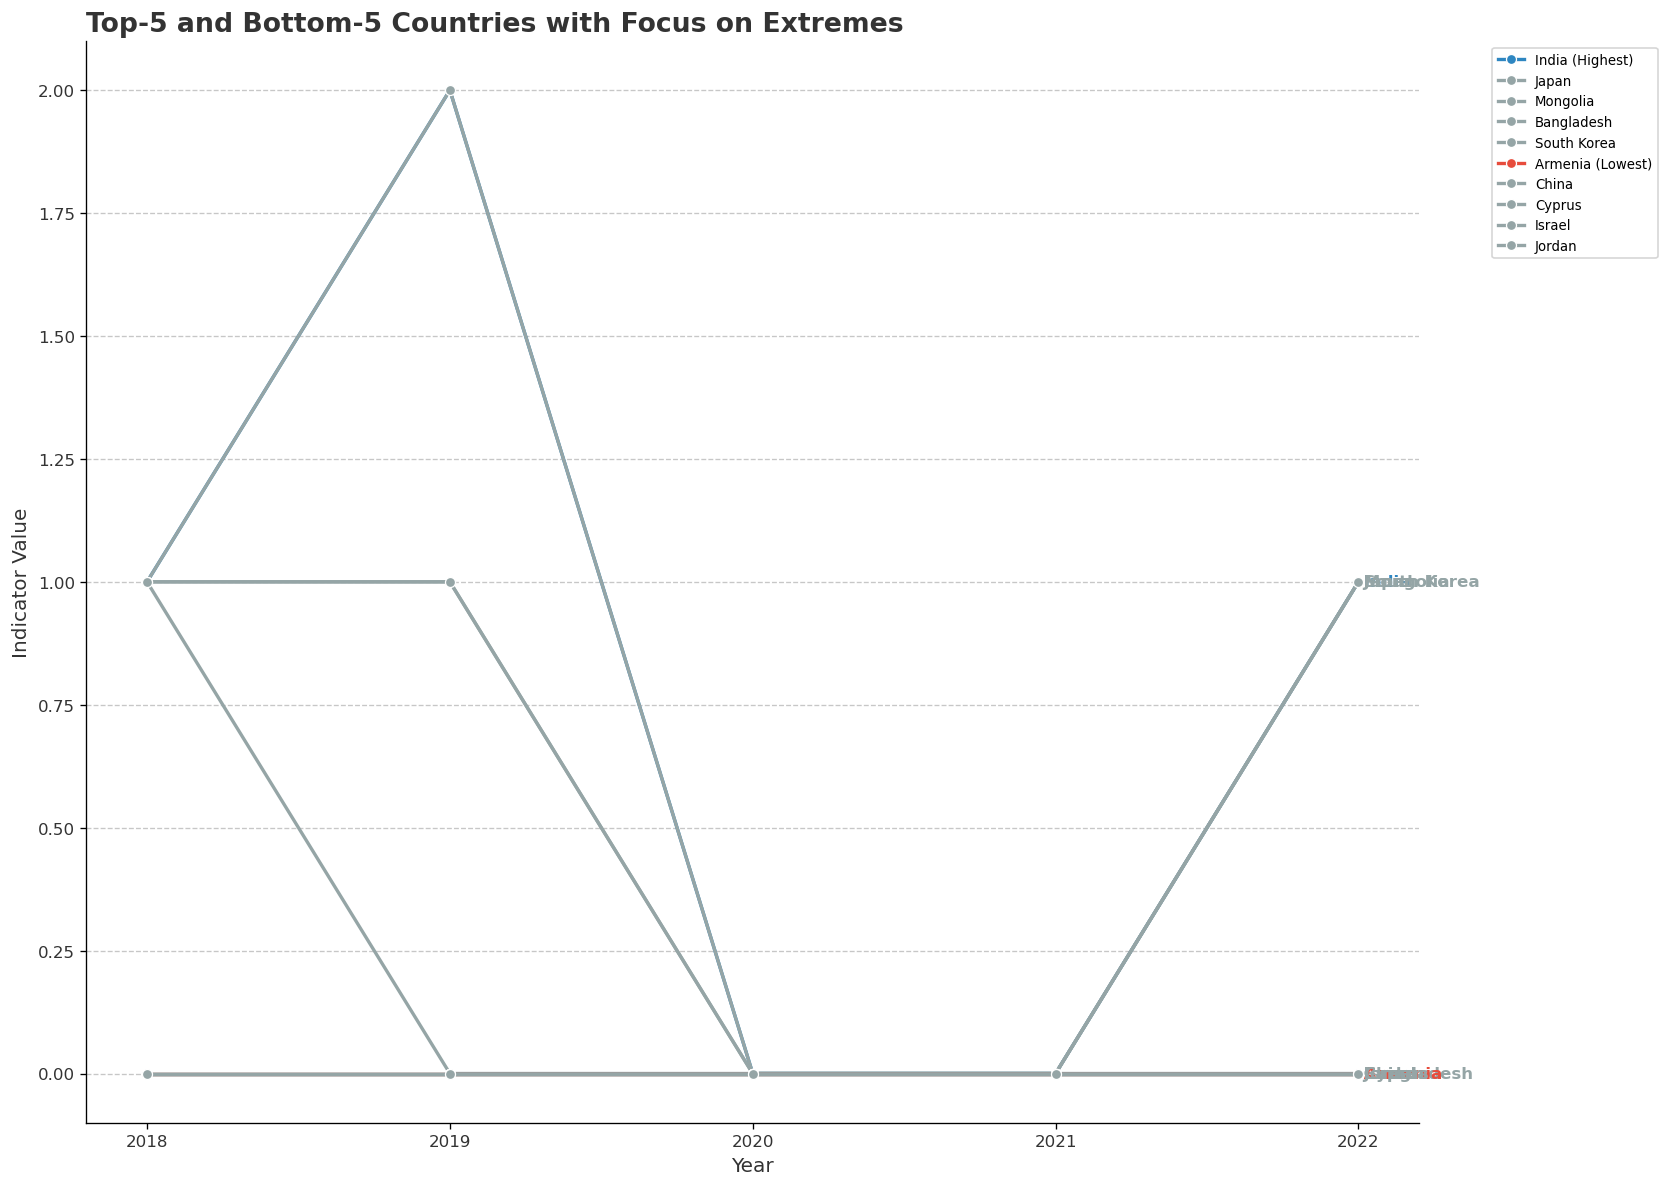

In [65]:
visualize_top_bottom_k_line_plot(Extreme_temperature, 5)

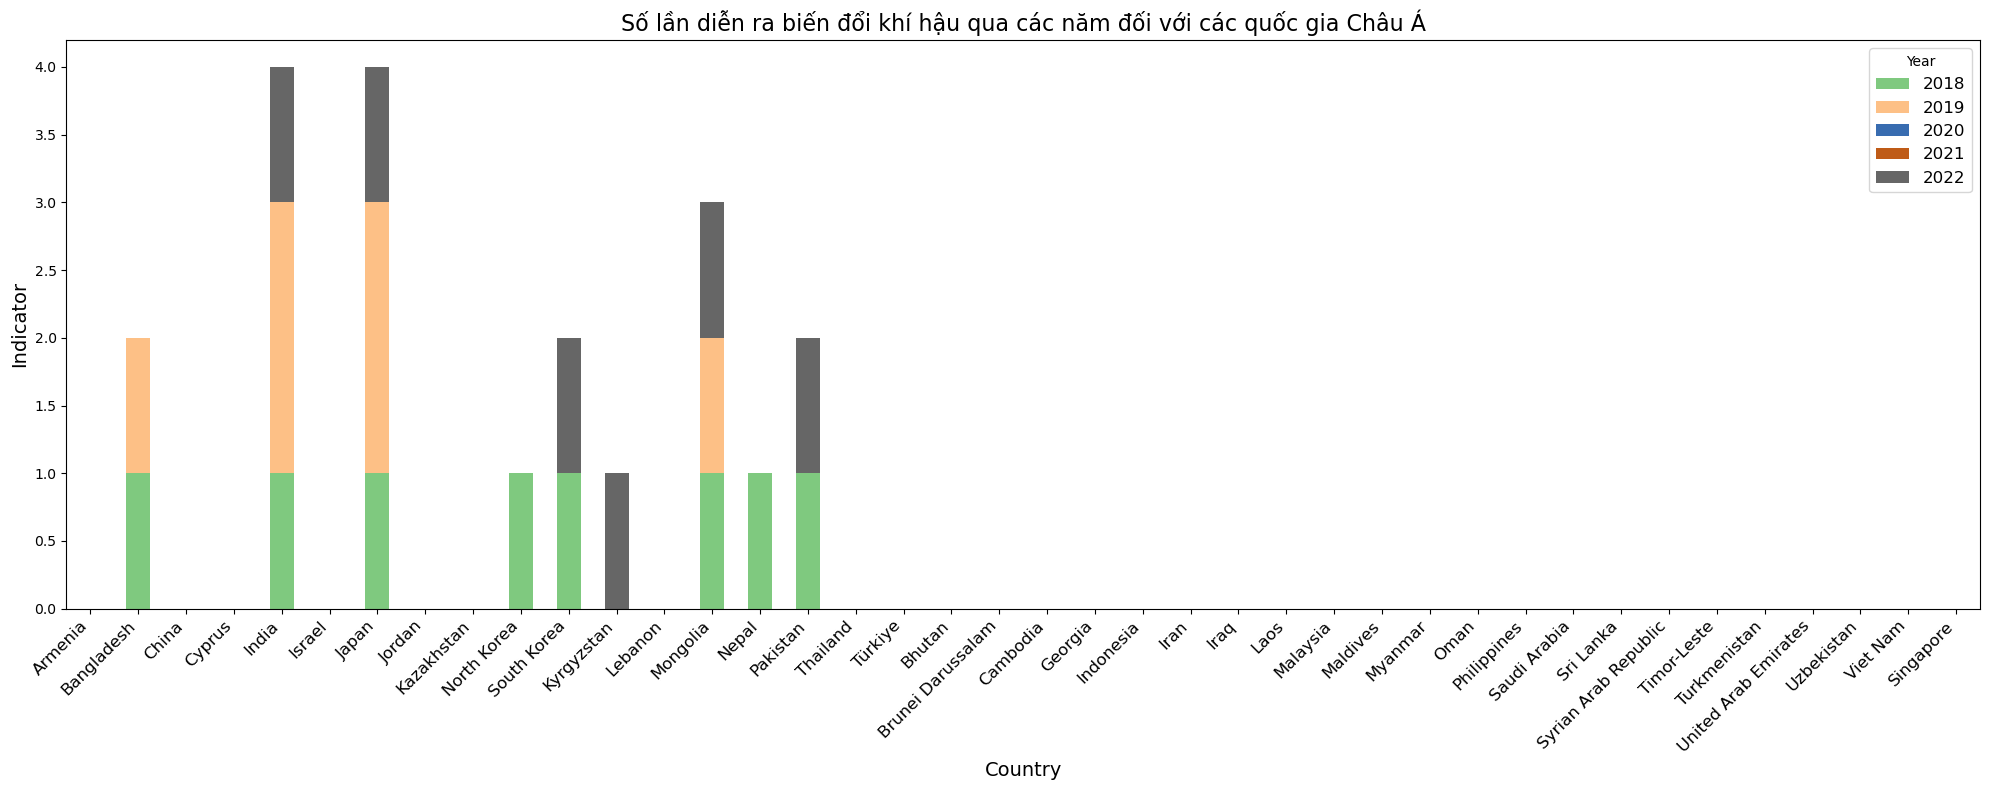

In [66]:
title = "Số lần diễn ra biến đổi khí hậu qua các năm đối với các quốc gia Châu Á"
visualize_change_stacked_bar_plot(Extreme_temperature, title)

## Wildfire

In [67]:
Wildfire = cdf[cdf['Indicator']=='Wildfire']
Wildfire

Country ISO3 Indicator       Unit  2018  2019  2020  2021  \
15                 Bhutan  BTN  Wildfire  Number of   0.0   0.0   0.0   0.0   
17      Brunei Darussalam  BRN  Wildfire  Number of   0.0   0.0   0.0   0.0   
28                  China  CHN  Wildfire  Number of   0.0   1.0   1.0   0.0   
33                 Cyprus  CYP  Wildfire  Number of   0.0   0.0   0.0   1.0   
44                  India  IND  Wildfire  Number of   1.0   0.0   0.0   0.0   
50              Indonesia  IDN  Wildfire  Number of   0.0   1.0   0.0   0.0   
56                   Iran  IRN  Wildfire  Number of   0.0   0.0   0.0   0.0   
66                 Israel  ISR  Wildfire  Number of   0.0   0.0   1.0   0.0   
72                  Japan  JPN  Wildfire  Number of   0.0   0.0   0.0   0.0   
84             Kazakhstan  KAZ  Wildfire  Number of   0.0   0.0   0.0   0.0   
96            South Korea  KOR  Wildfire  Number of   0.0   1.0   0.0   0.0   
111               Lebanon  LBN  Wildfire  Number of   0.0   0.0   1.0   0.0   
117              Malaysia  MYS  Wildfire  Number of   0.0   0.0   0.0   0.0   
127              Mongolia  MNG  Wildfire  Number of   0.0   0.0   0.0   0.0   
132               Myanmar  MMR  Wildfire  Number of   0.0   0.0   0.0   0.0   
139                 Nepal  NPL  Wildfire  Number of   0.0   0.0   0.0   0.0   
149              Pakistan  PAK  Wildfire  Number of   0.0   0.0   0.0   0.0   
155           Philippines  PHL  Wildfire  Number of   0.0   0.0   0.0   0.0   
169  Syrian Arab Republic  SYR  Wildfire  Number of   0.0   0.0   1.0   0.0   
176              Thailand  THA  Wildfire  Number of   0.0   0.0   0.0   0.0   
186               Türkiye  TUR  Wildfire  Number of   0.0   0.0   0.0   1.0   
200              Viet Nam  VNM  Wildfire  Number of   0.0   0.0   0.0   0.0   
201               Armenia  ARM  Wildfire  Number of   0.0   0.0   0.0   0.0   
202            Bangladesh  BGD  Wildfire  Number of   0.0   0.0   0.0   0.0   
213              Cambodia  KHM  Wildfire  Number of   0.0   0.0   0.0   0.0   
218               Georgia  GEO  Wildfire  Number of   0.0   0.0   0.0   0.0   
223                  Iraq  IRQ  Wildfire  Number of   0.0   0.0   0.0   0.0   
227                Jordan  JOR  Wildfire  Number of   0.0   0.0   0.0   0.0   
229           North Korea  PRK  Wildfire  Number of   0.0   0.0   0.0   0.0   
230            Kyrgyzstan  KGZ  Wildfire  Number of   0.0   0.0   0.0   0.0   
233                  Laos  LAO  Wildfire  Number of   0.0   0.0   0.0   0.0   
240              Maldives  MDV  Wildfire  Number of   0.0   0.0   0.0   0.0   
246                  Oman  OMN  Wildfire  Number of   0.0   0.0   0.0   0.0   
251          Saudi Arabia  SAU  Wildfire  Number of   0.0   0.0   0.0   0.0   
253             Sri Lanka  LKA  Wildfire  Number of   0.0   0.0   0.0   0.0   
257           Timor-Leste  TLS  Wildfire  Number of   0.0   0.0   0.0   0.0   
260          Turkmenistan  TKM  Wildfire  Number of   0.0   0.0   0.0   0.0   
265  United Arab Emirates  ARE  Wildfire  Number of   0.0   0.0   0.0   0.0   
271            Uzbekistan  UZB  Wildfire  Number of   0.0   0.0   0.0   0.0   
279             Singapore  SGP  Wildfire  Number of   0.0   0.0   0.0   0.0   

     2022  
15    0.0  
17    0.0  
28    0.0  
33    0.0  
44    0.0  
50    0.0  
56    0.0  
66    0.0  
72    0.0  
84    0.0  
96    1.0  
111   0.0  
117   0.0  
127   0.0  
132   0.0  
139   0.0  
149   1.0  
155   0.0  
169   0.0  
176   0.0  
186   0.0  
200   0.0  
201   0.0  
202   0.0  
213   0.0  
218   0.0  
223   0.0  
227   0.0  
229   0.0  
230   0.0  
233   0.0  
240   0.0  
246   0.0  
251   0.0  
253   0.0  
257   0.0  
260   0.0  
265   0.0  
271   0.0  
279   0.0

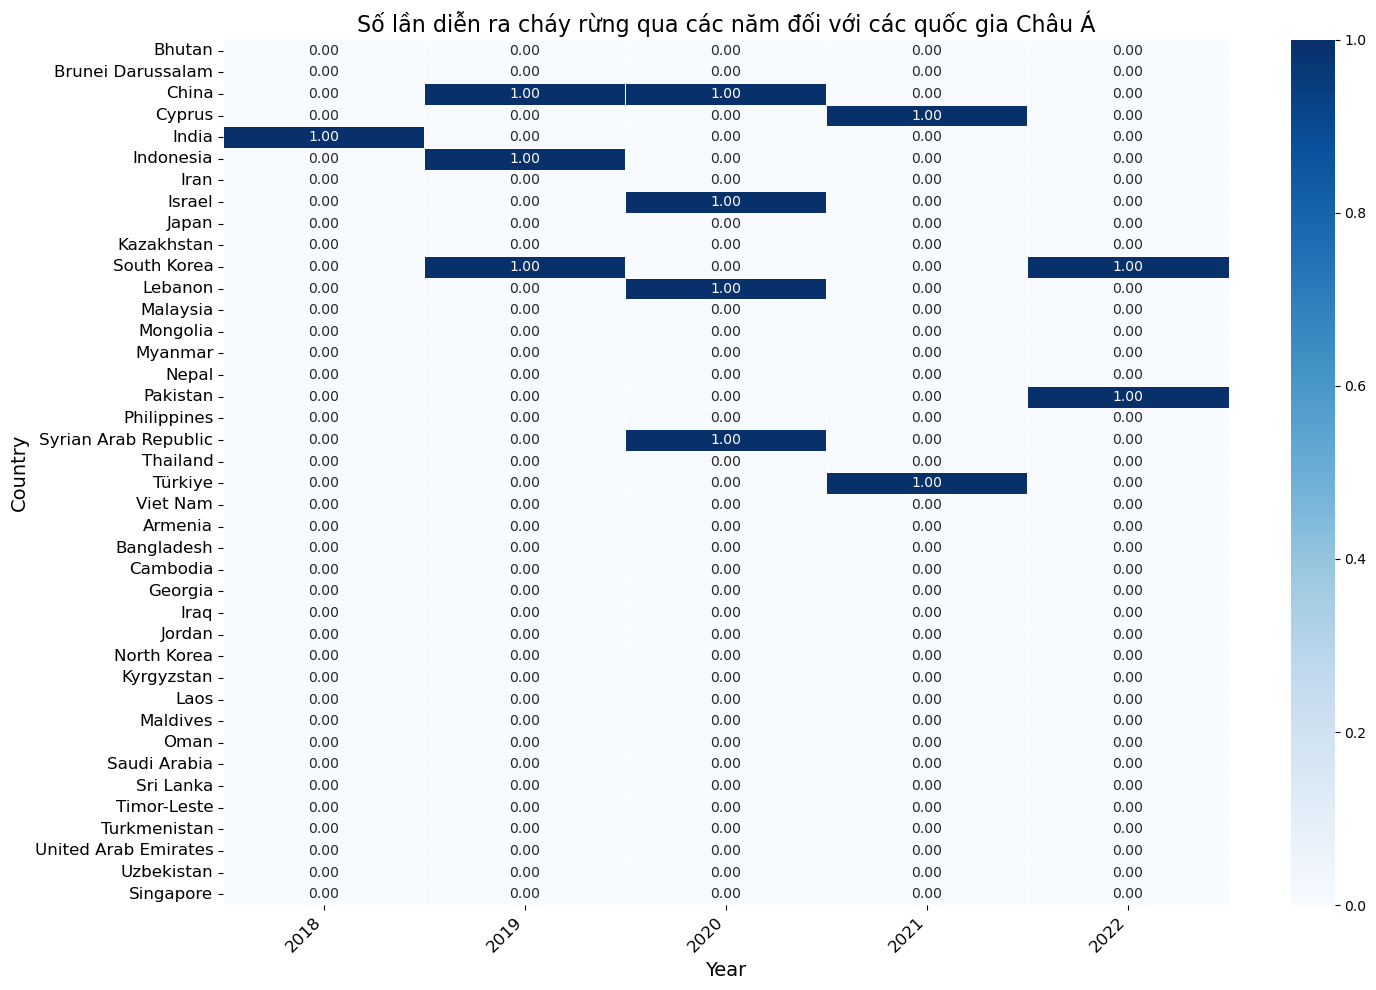

In [68]:
title = "Số lần diễn ra cháy rừng qua các năm đối với các quốc gia Châu Á"
visualize_change_heatmap(Wildfire, title)

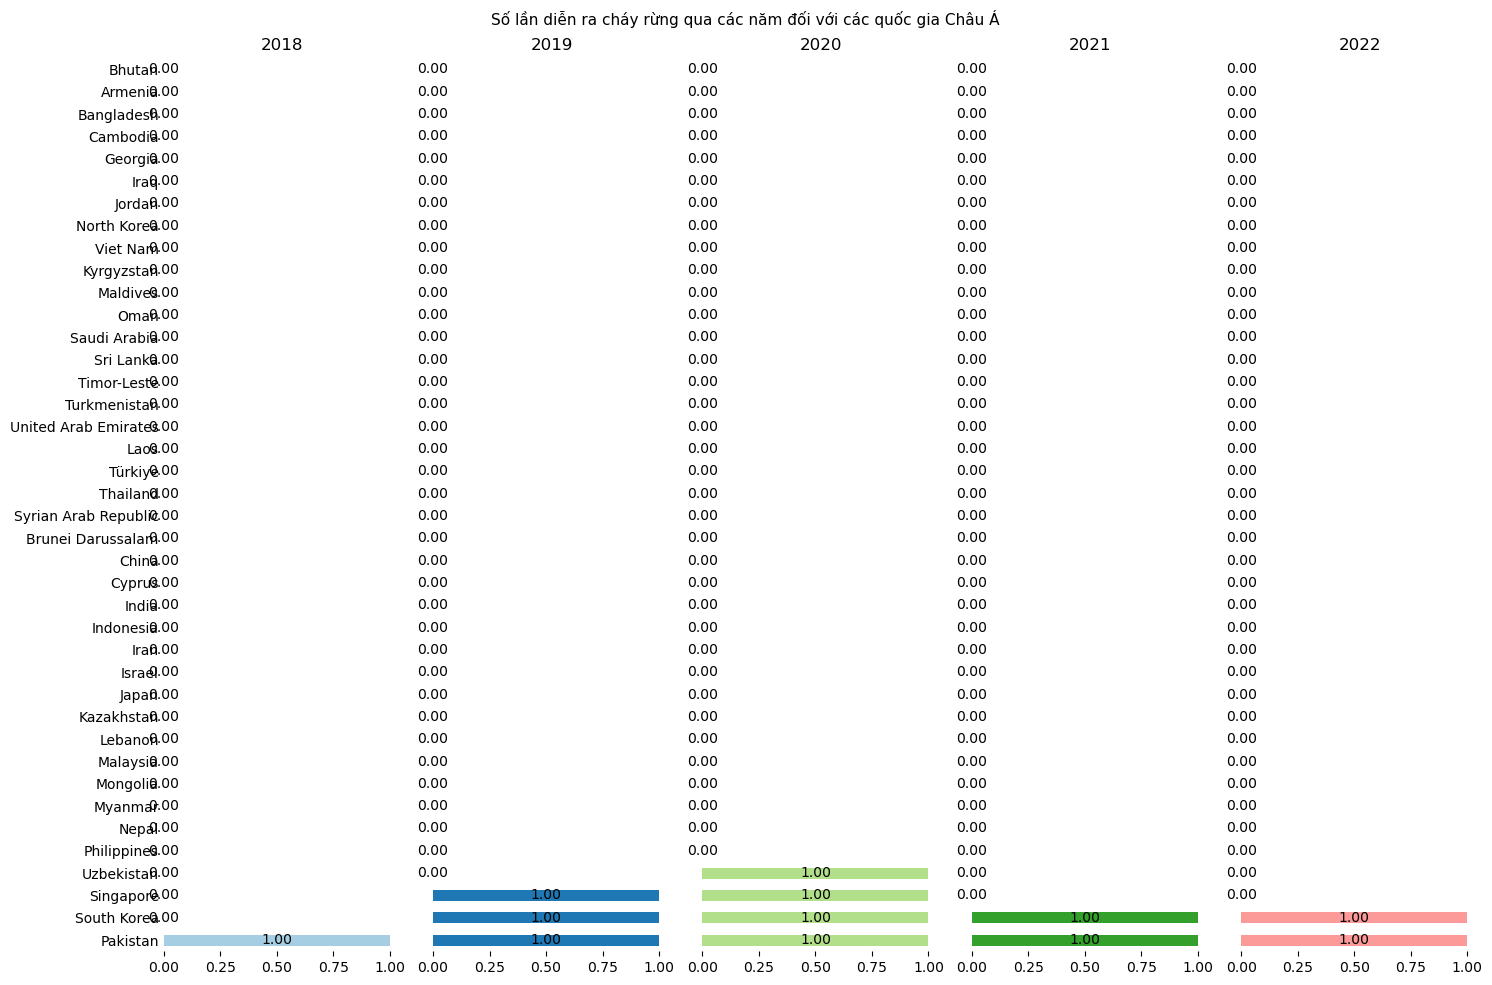

In [69]:
title="Số lần diễn ra cháy rừng qua các năm đối với các quốc gia Châu Á"
visualize_change_panel_bar_plot(Wildfire, title)

Lấy Top3 nước có sự thay đổi nhiệt độ lớn nhất trong khu vực theo các năm

In [70]:
top_k_countries_by_year(Wildfire, k=3)

Top 3 countries for 2018:
Country: India, Value: 1.000
Country: Bhutan, Value: 0.000
Country: Laos, Value: 0.000
----------------------------------------
Top 3 countries for 2019:
Country: South Korea, Value: 1.000
Country: China, Value: 1.000
Country: Indonesia, Value: 1.000
----------------------------------------
Top 3 countries for 2020:
Country: Lebanon, Value: 1.000
Country: China, Value: 1.000
Country: Syrian Arab Republic, Value: 1.000
----------------------------------------
Top 3 countries for 2021:
Country: Türkiye, Value: 1.000
Country: Cyprus, Value: 1.000
Country: Laos, Value: 0.000
----------------------------------------
Top 3 countries for 2022:
Country: South Korea, Value: 1.000
Country: Pakistan, Value: 1.000
Country: Laos, Value: 0.000
----------------------------------------


In [71]:
bottom_k_countries_by_year(Wildfire, k=3)

Bottom 3 countries for 2018:
Country: Bhutan, Value: 0.000
Country: Armenia, Value: 0.000
Country: Bangladesh, Value: 0.000
----------------------------------------
Bottom 3 countries for 2019:
Country: Bhutan, Value: 0.000
Country: Armenia, Value: 0.000
Country: Bangladesh, Value: 0.000
----------------------------------------
Bottom 3 countries for 2020:
Country: Bhutan, Value: 0.000
Country: Armenia, Value: 0.000
Country: Bangladesh, Value: 0.000
----------------------------------------
Bottom 3 countries for 2021:
Country: Bhutan, Value: 0.000
Country: Armenia, Value: 0.000
Country: Bangladesh, Value: 0.000
----------------------------------------
Bottom 3 countries for 2022:
Country: Bhutan, Value: 0.000
Country: Armenia, Value: 0.000
Country: Bangladesh, Value: 0.000
----------------------------------------


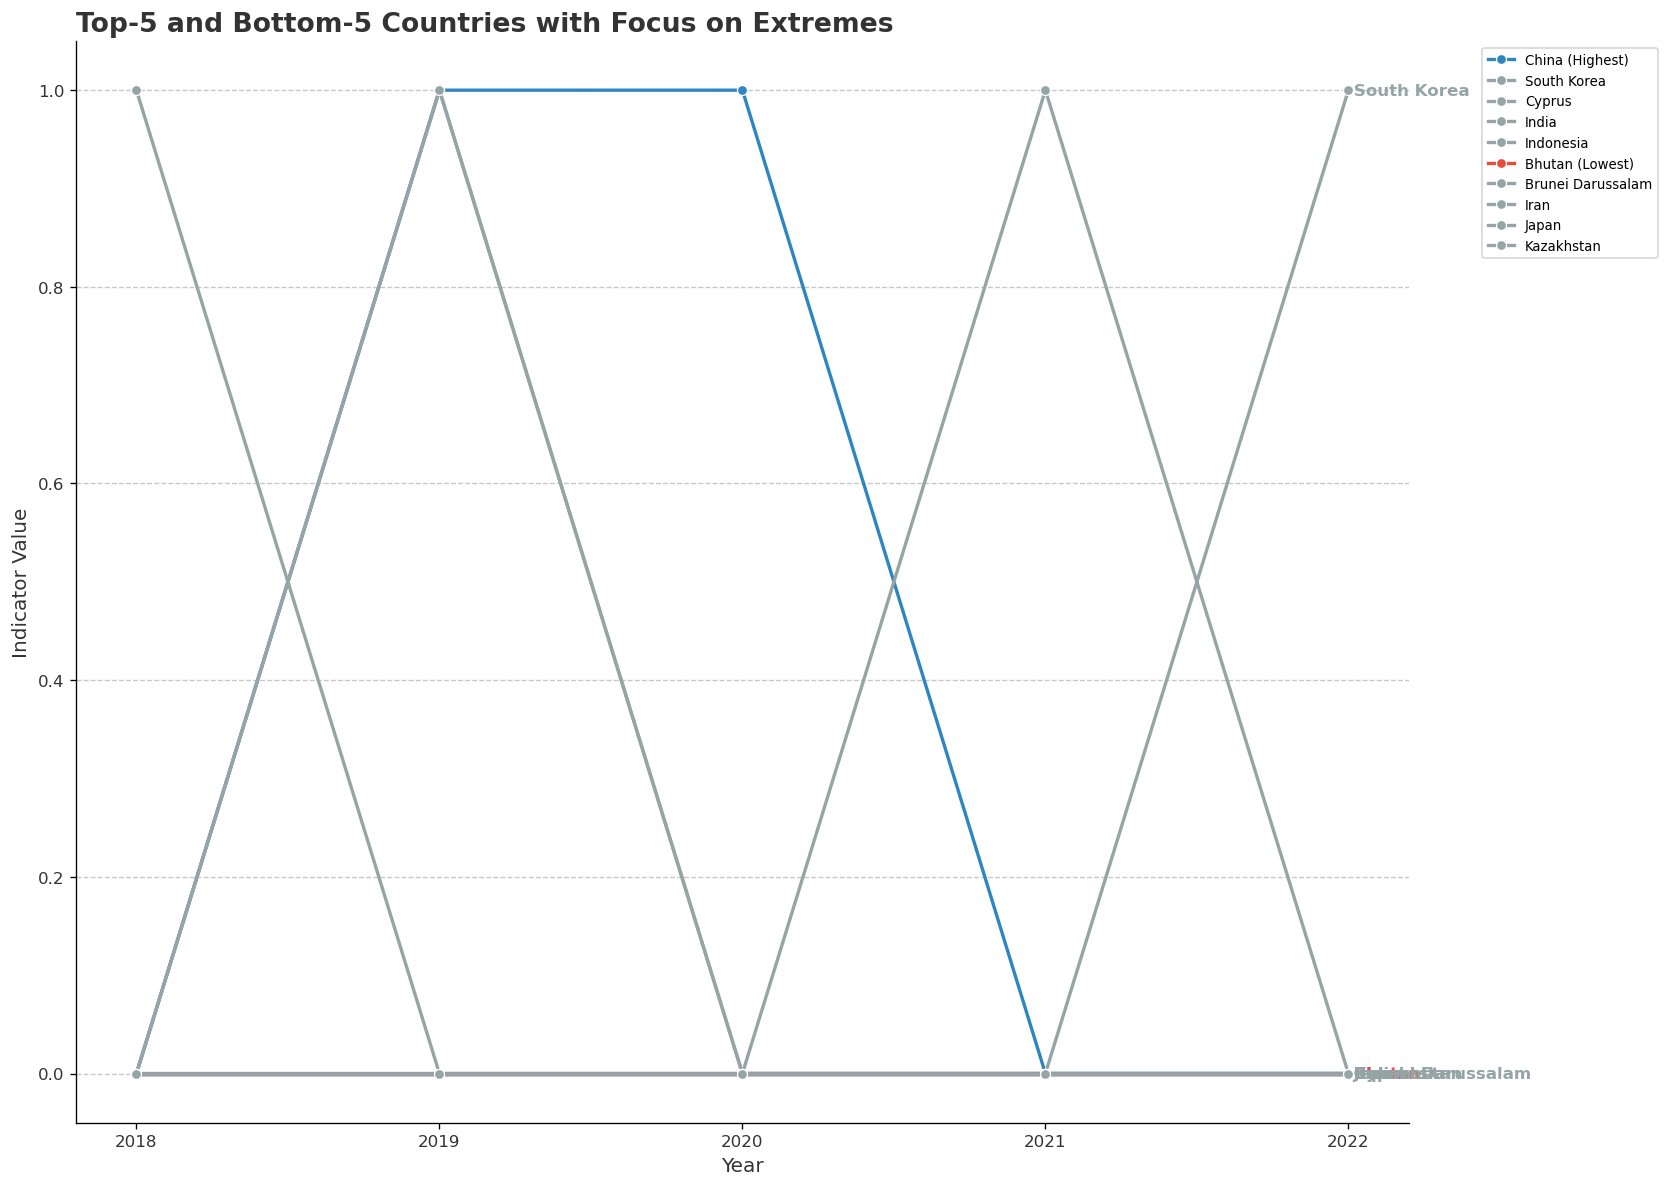

In [72]:
visualize_top_bottom_k_line_plot(Wildfire, 5)

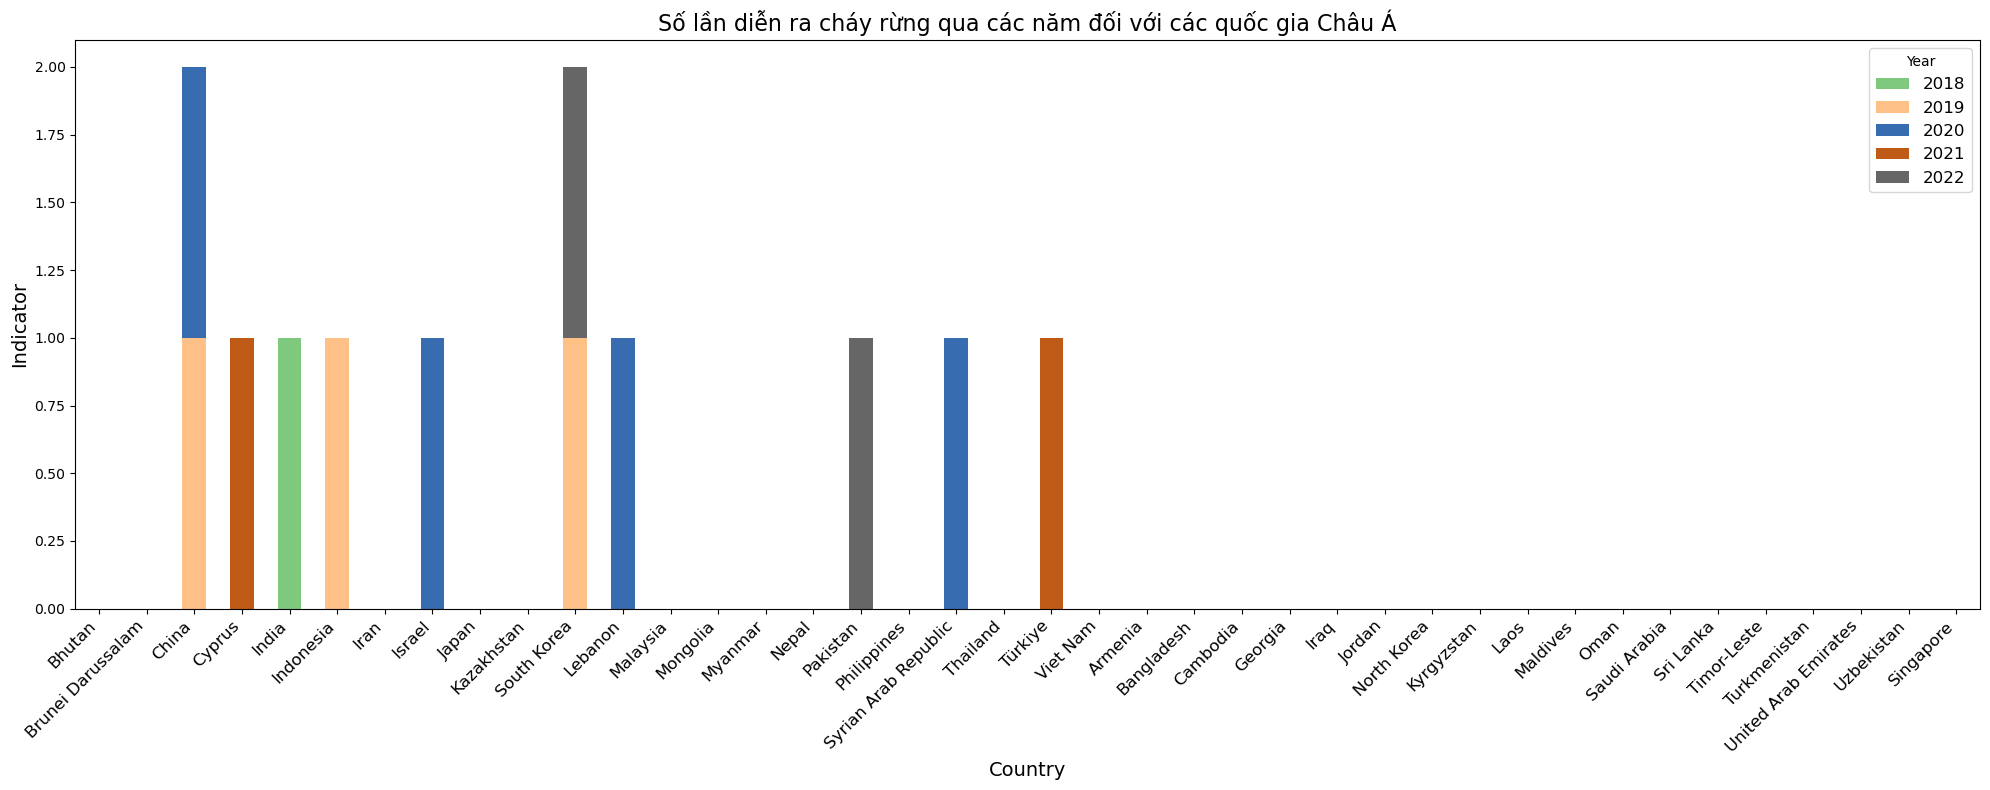

In [73]:
title = "Số lần diễn ra cháy rừng qua các năm đối với các quốc gia Châu Á"
visualize_change_stacked_bar_plot(Wildfire, title)